In [154]:
import pandas as pd
train = pd.read_csv('./data/train.csv')

In [155]:
train.shape

(476168, 39)

In [156]:
train.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   350809       0          6              1          7              1   
1   551465       0          1              1          4              0   
2   668314       0          2              1          5              0   
3  1378255       0          0              1          3              0   
4   519698       0          4              1          5              0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin    ...      \
0              0              0              0              0    ...       
1              0              1              0              0    ...       
2              0              1              0              0    ...       
3              0              1              0              0    ...       
4              0              0              0              0    ...       

   ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  \
0              1              1              0              1            103   
1              1              1              2              1             51   
2              1              1              2              1             87   
3              1              1              2              1            103   
4              1              1              0              1             11   

   ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  
0          1   0.316228   0.608955   0.358329   2.828427  
1          2   0.400000   0.968398   0.408412   3.605551  
2          3   0.316228   0.685581   0.361525   3.162278  
3          3   0.316228   0.678065   0.358329   3.316625  
4          2   0.316228   0.677090   0.368782   3.464102  

[5 rows x 39 columns]

In [157]:
import numpy as np

train['ps_reg_01'] = (train.ps_reg_01 * 10).astype('int')
train['ps_reg_02'] = (train.ps_reg_02 * 10).astype('int')
train['ps_reg_04'] = (((train.ps_reg_03.replace(-1, np.NaN) * 40) ** 2) % 27).fillna(-1).astype('int')
train['ps_reg_05'] = (((train.ps_reg_03.replace(-1, np.NaN) * 40) ** 2) // 27).fillna(-1).astype('int')

train['ps_car_12'] = ((train.ps_car_12 ** 2) * 10000).round().astype('int')
train['ps_car_13'] = ((train.ps_car_13 * 220) ** 2).round(2).astype('int')
train['ps_car_14'] = ((train.ps_car_14.replace(-1, np.NaN) ** 2) * 1000).round().fillna(-1).astype('int')
train['ps_car_15'] = (train.ps_car_15 ** 2).astype('int')

train['ps_ind_06_09_cat'] = \
  train.ps_ind_06_bin * 1 + train.ps_ind_07_bin * 2 + train.ps_ind_08_bin * 3 + train.ps_ind_09_bin * 4
train['ps_ind_06_09_cat'] = train.ps_ind_06_09_cat - train.ps_ind_06_09_cat.min()
    
train['ps_ind_16_18_cat'] = train.ps_ind_16_bin * 1 + train.ps_ind_17_bin * 2 + train.ps_ind_18_bin * 3
train['ps_ind_16_18_cat'] = train.ps_ind_16_18_cat - train.ps_ind_16_18_cat.min()

train.drop([
    'id', 'ps_ind_14', 'ps_reg_03', 
    'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
    'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin'
], axis=1, inplace=True)

## Feature analysis

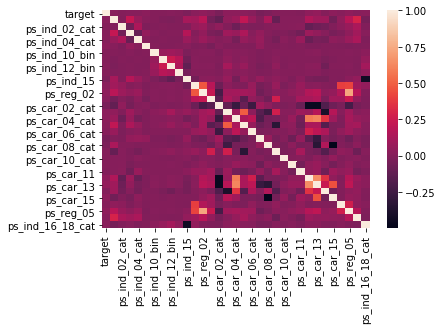

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

car_columns = [
    'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 
    'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 
    'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_11_cat', 
    'ps_car_15', 
    # Too many levels here
    # 'ps_car_12', 'ps_car_14'
]

ind_columns = [
    'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
    'ps_ind_05_cat', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
    'ps_ind_13_bin', 'ps_ind_15', 'ps_ind_06_09_cat', 'ps_ind_16_18_cat'
]

sns.heatmap(train.corr());

### ps_ind_01

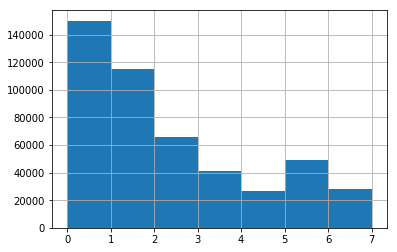

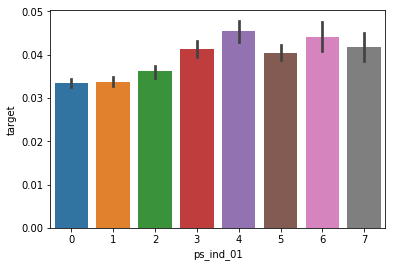

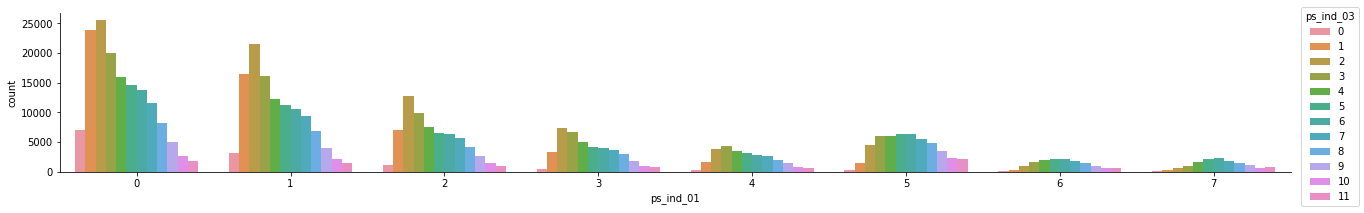

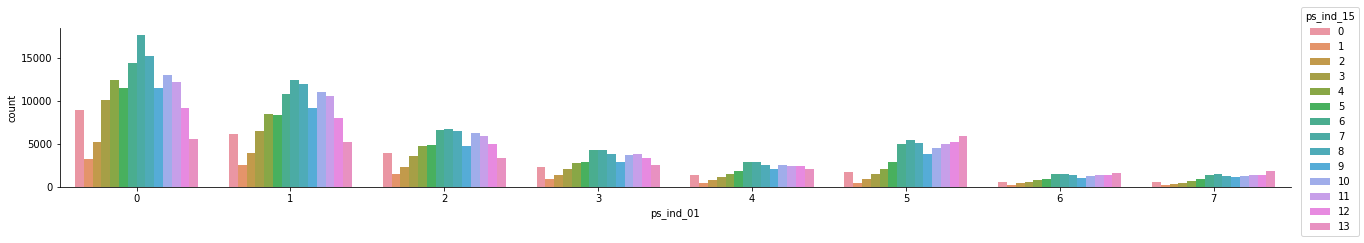

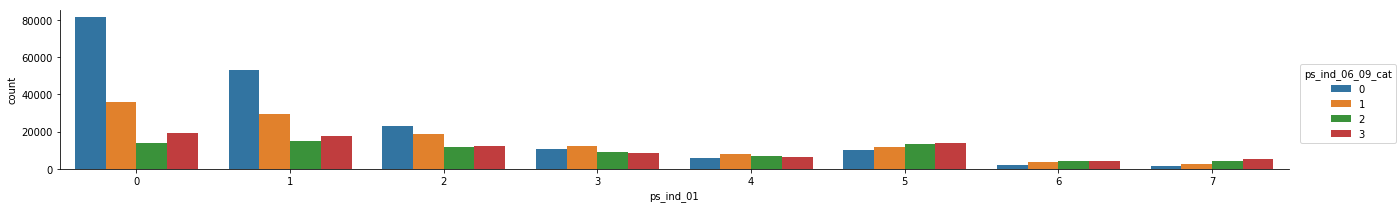

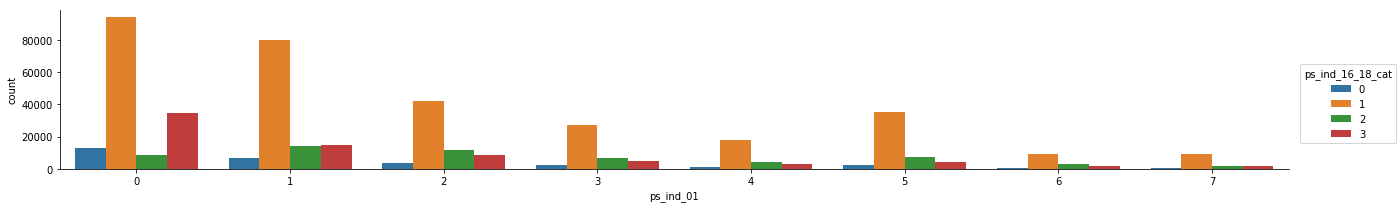

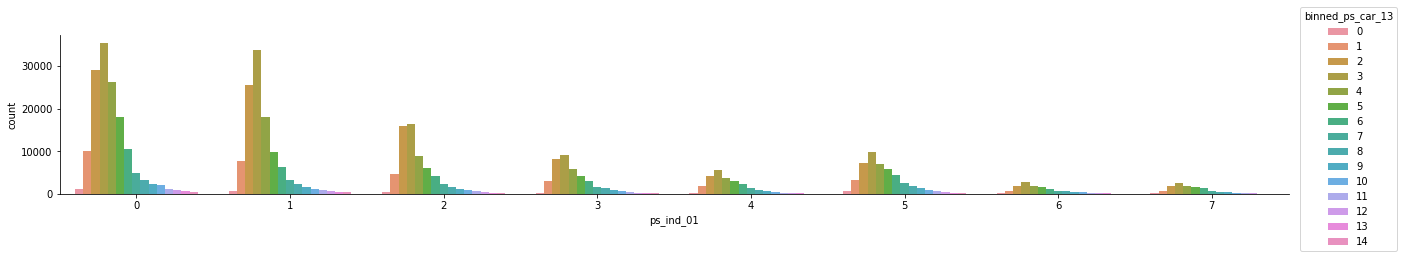

In [66]:
train.ps_ind_01.hist(bins=7)
plt.figure()
sns.barplot(x='ps_ind_01', y='target', data=train)

tmp_train = train[train.ps_car_13 < 100000].copy()
tmp_train['binned_ps_car_13'] = pd.cut(tmp_train.ps_car_13, bins=15, labels=False)

sns.factorplot(x='ps_ind_01', hue='ps_ind_03', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_01', hue='ps_ind_15', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_01', hue='ps_ind_06_09_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_01', hue='ps_ind_16_18_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_01', hue='binned_ps_car_13', data=tmp_train, kind='count', size=3, aspect=6)

### (Occupation) ps_ind_02_cat
Presumably, occupation categories like working, learning, pension and etc.

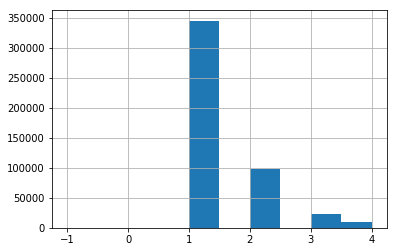

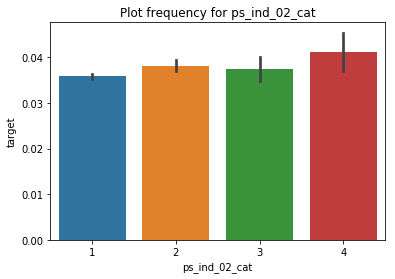

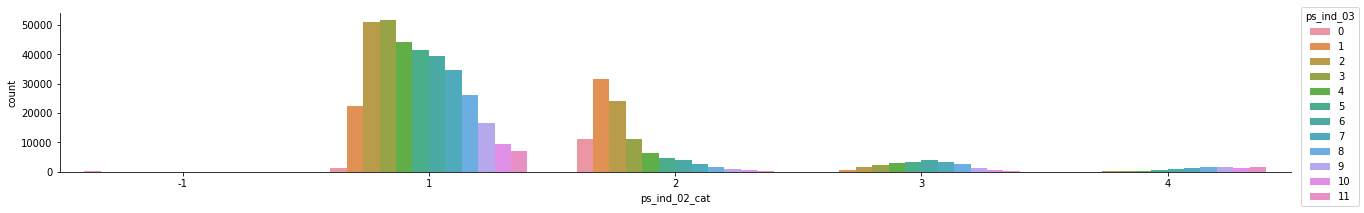

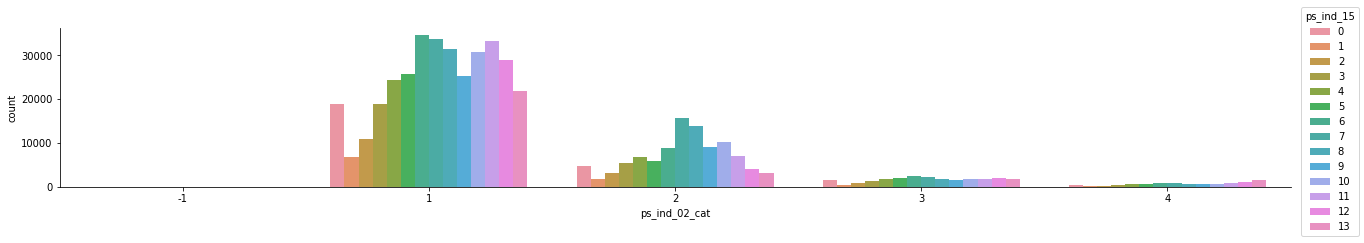

In [22]:
train.ps_ind_02_cat.hist()
plt.figure()
sns.barplot(x='ps_ind_02_cat', y='target', data=train[train.ps_ind_02_cat > -1])
plt.title('Plot frequency for ps_ind_02_cat')
sns.factorplot(x='ps_ind_02_cat', hue='ps_ind_03', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_02_cat', hue='ps_ind_15', data=train, kind='count', size=3, aspect=6)

### (Driver Age) ps_ind_03
The age of the driver:
* Seems to fit distributions from external sources
* Young driversa form one of the highest risk groups
* Interesting interactions with ps_ind_02_cat, ps_ind_04_cat, ps_ind_15, ps_ind_06_09_cat and ps_ind_16_18_cat

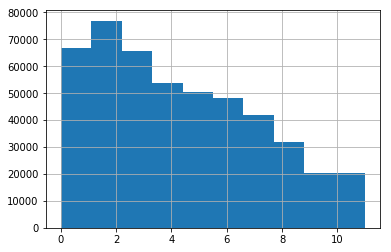

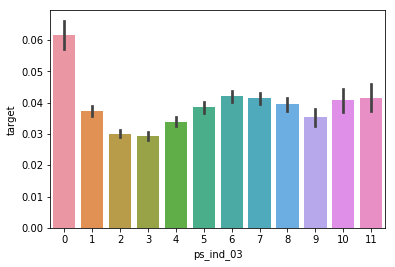

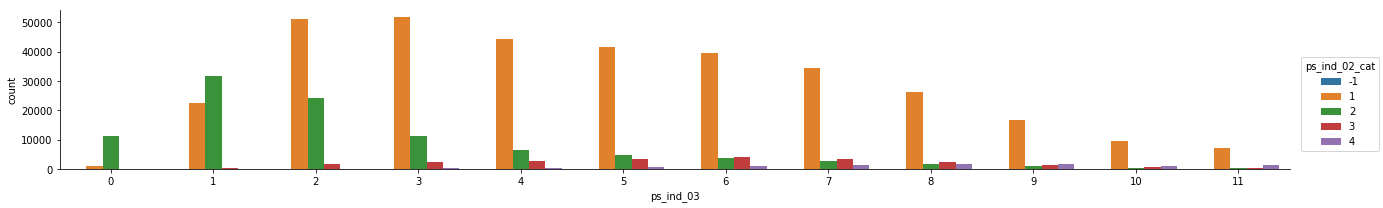

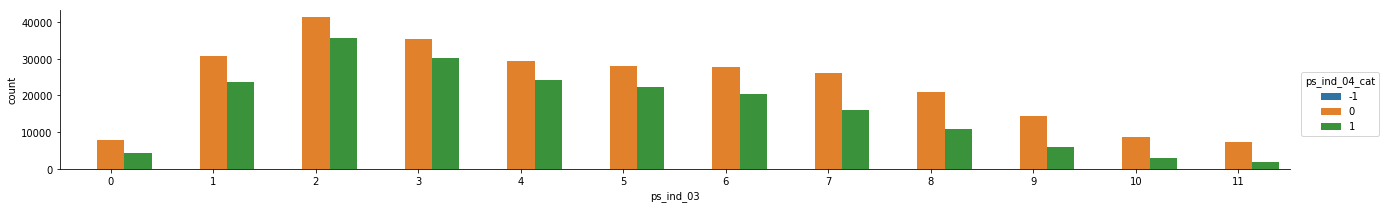

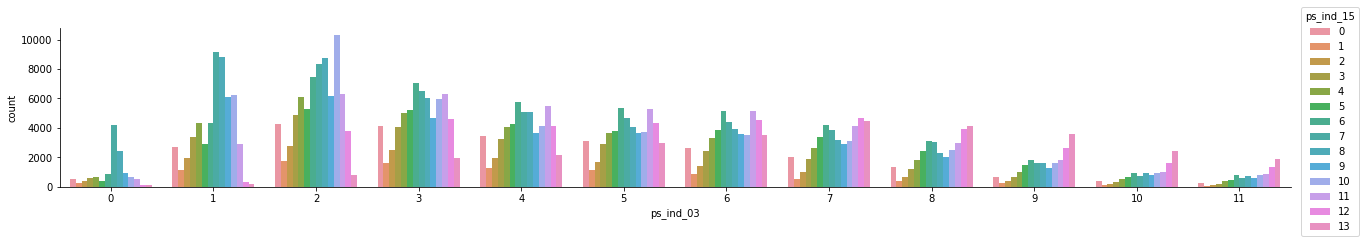

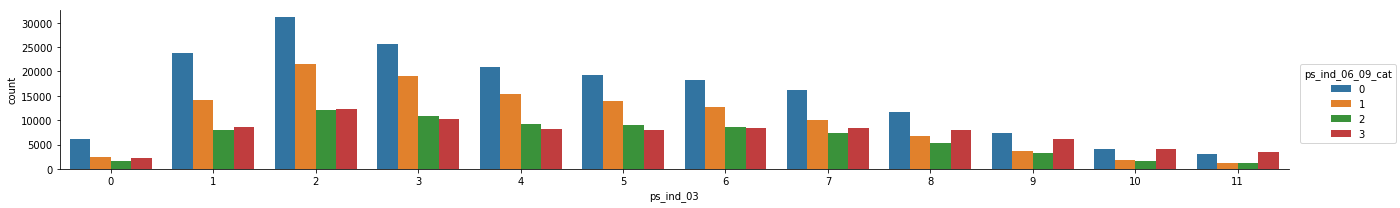

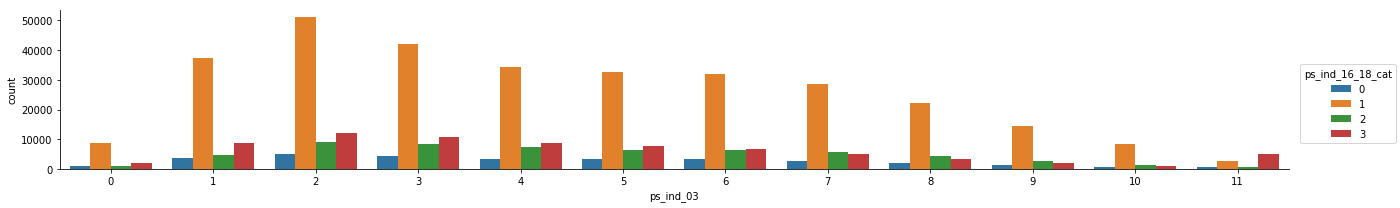

In [25]:
train.ps_ind_03.hist()
plt.figure()
sns.barplot(x='ps_ind_03', y='target', data=train)
sns.factorplot(x='ps_ind_03', hue='ps_ind_02_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_03', hue='ps_ind_04_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_03', hue='ps_ind_15', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_03', hue='ps_ind_06_09_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_03', hue='ps_ind_16_18_cat', data=train, kind='count', size=3, aspect=6)

### (Gender) ps_ind_04_cat
0 is presumably male, and 1 is female:
* The only binary feature for it across ps_ind_*
* Distribution seems to match info from external sources

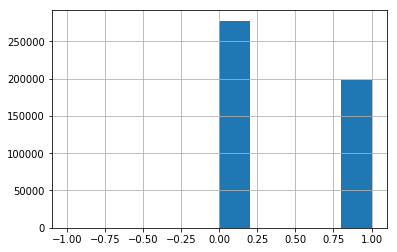

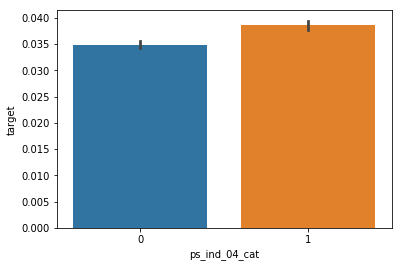

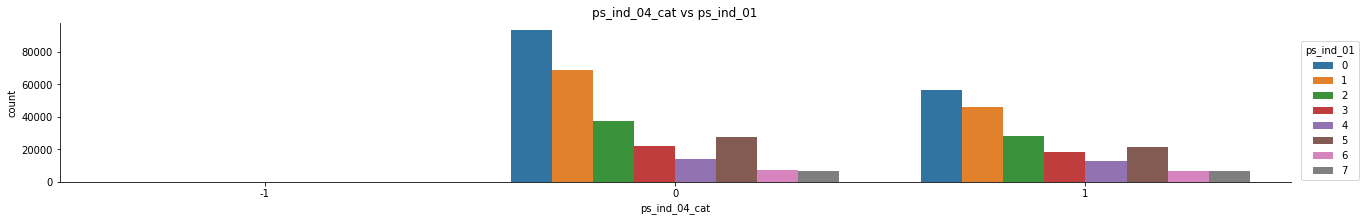

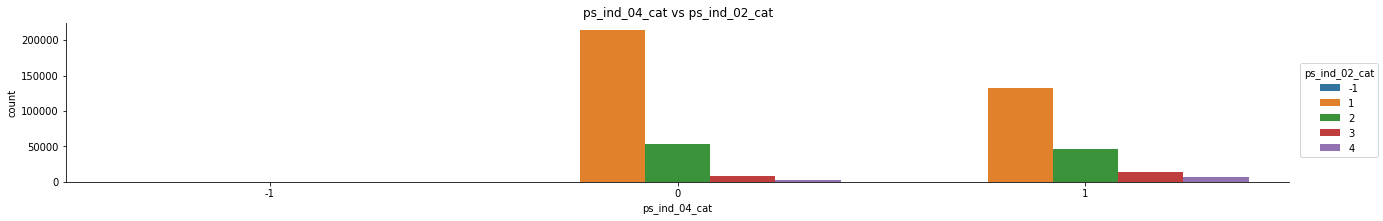

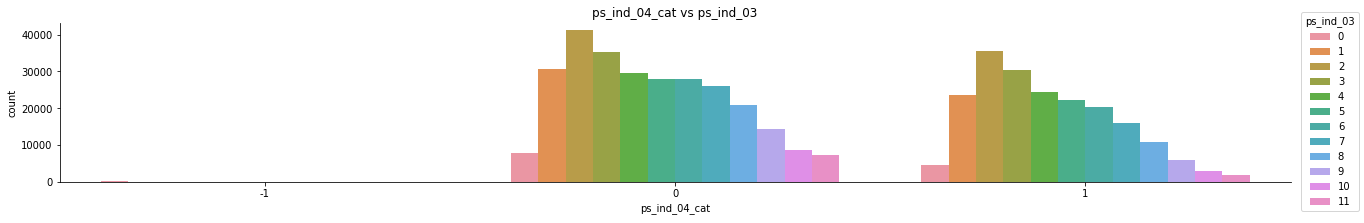

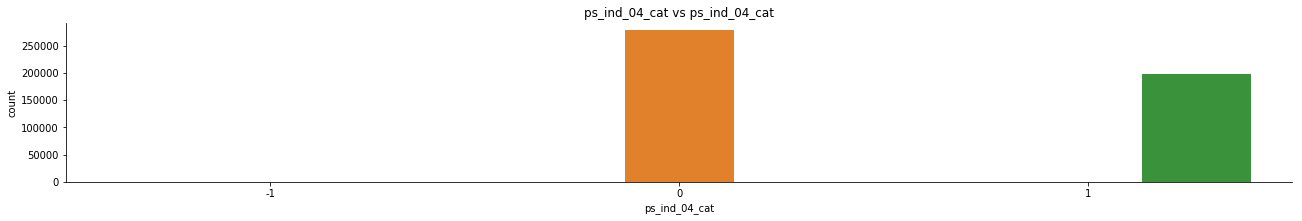

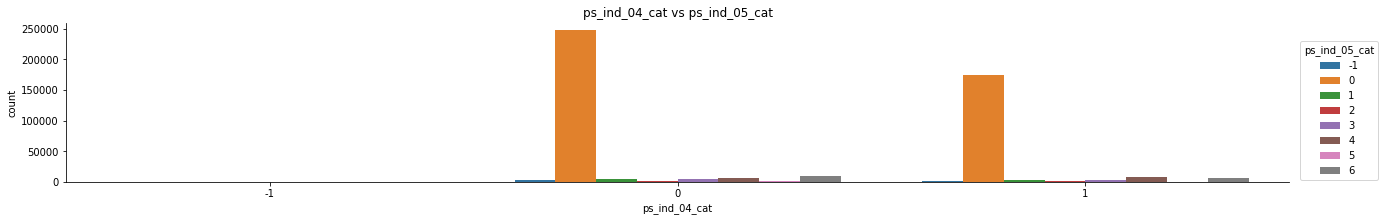

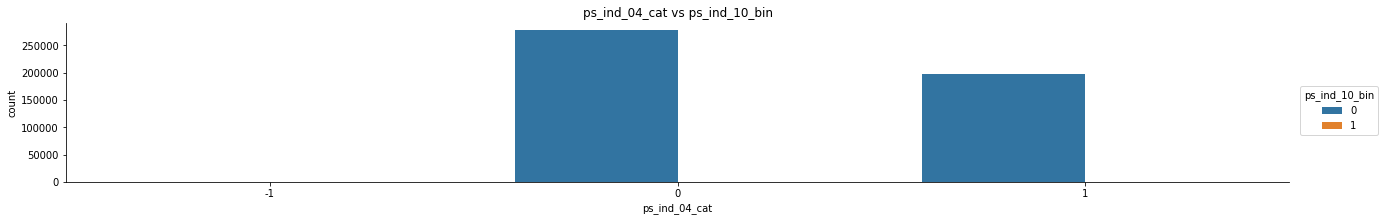

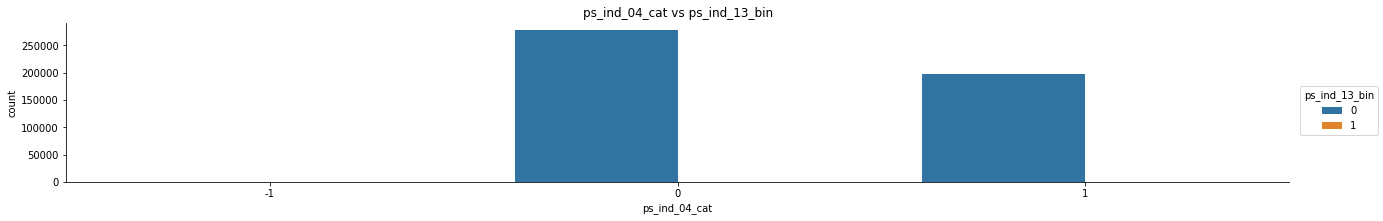

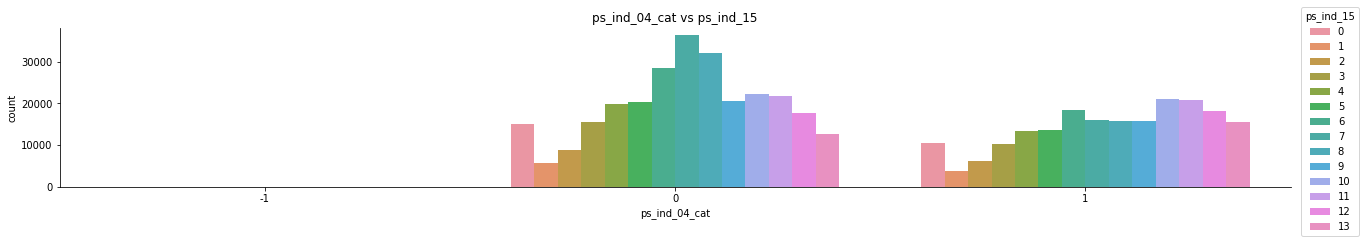

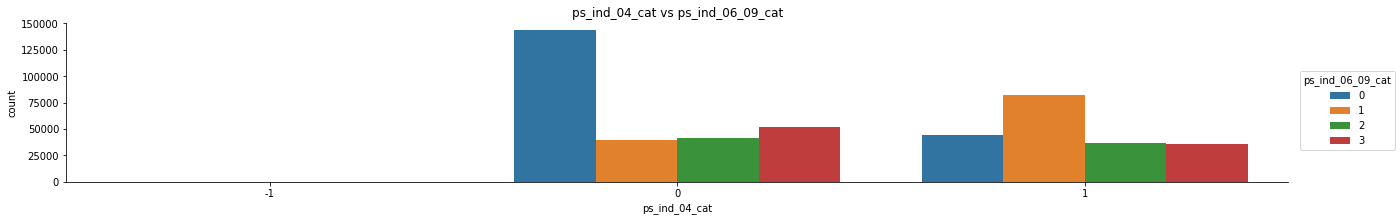

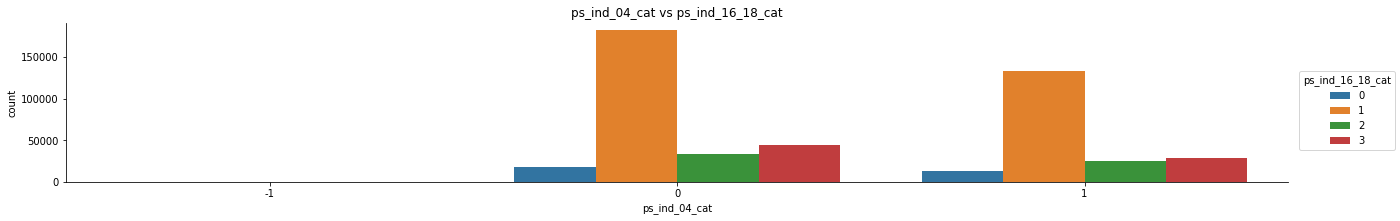

In [55]:
train.ps_ind_04_cat.hist()
plt.figure()
sns.barplot(x='ps_ind_04_cat', y='target', data=train[train.ps_ind_04_cat > -1])

for column in ind_columns:
    plt.figure()
    sns.factorplot(x='ps_ind_04_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_ind_04_cat vs ' + column)
    plt.show()

### ps_ind_05_cat

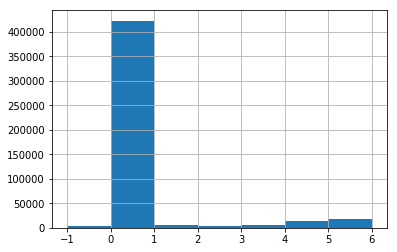

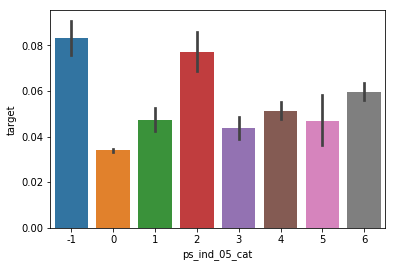

In [69]:
train.ps_ind_05_cat.hist(bins=7)
plt.figure()
sns.barplot(x='ps_ind_05_cat', y='target', data=train)

# for column in ind_columns:
#     plt.figure()
#     sns.factorplot(x='ps_ind_05_cat', hue=column, data=train, kind='count', size=3, aspect=6)
#     plt.title('ps_ind_05_cat vs ' + column)
#     plt.show()

### ps_ind_06_09_cat

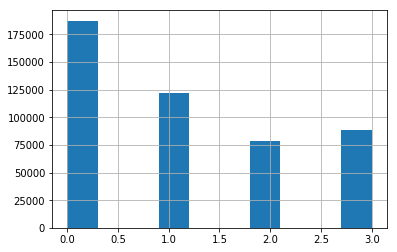

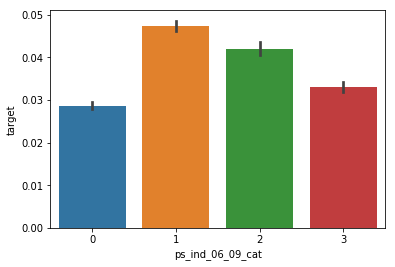

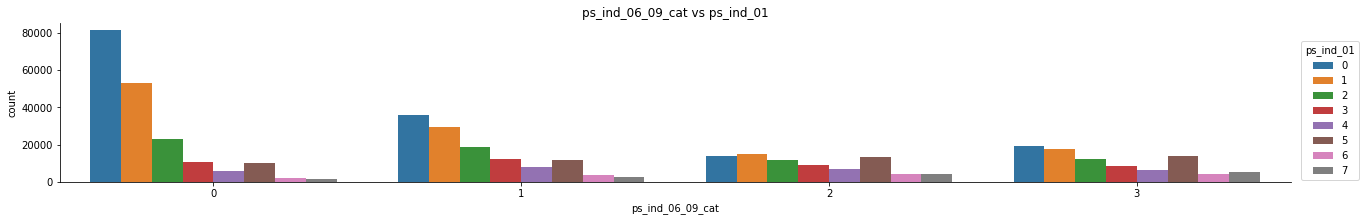

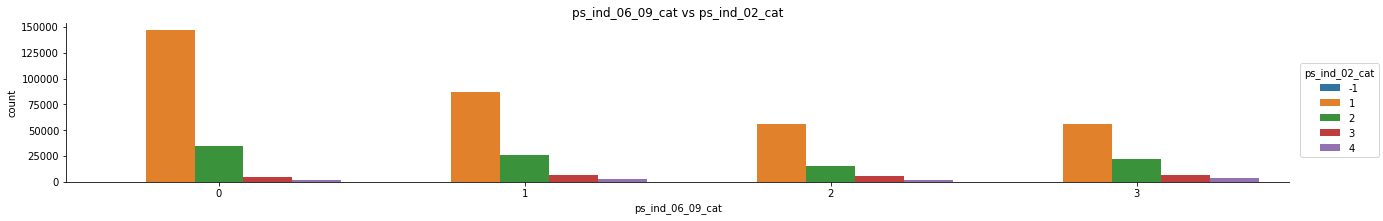

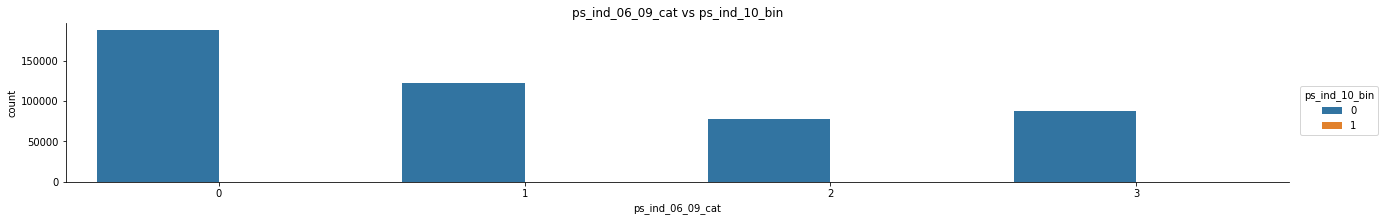

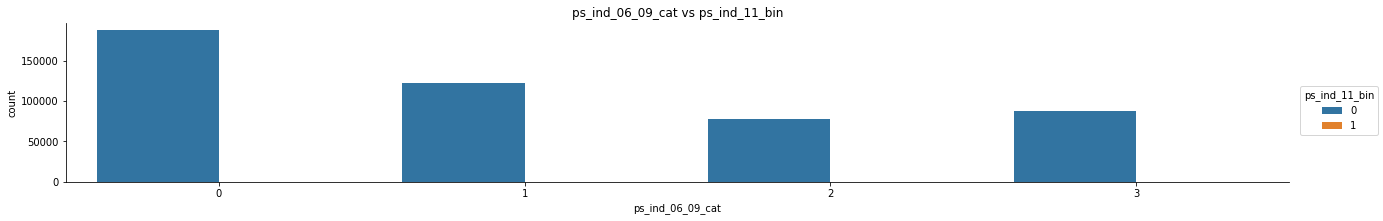

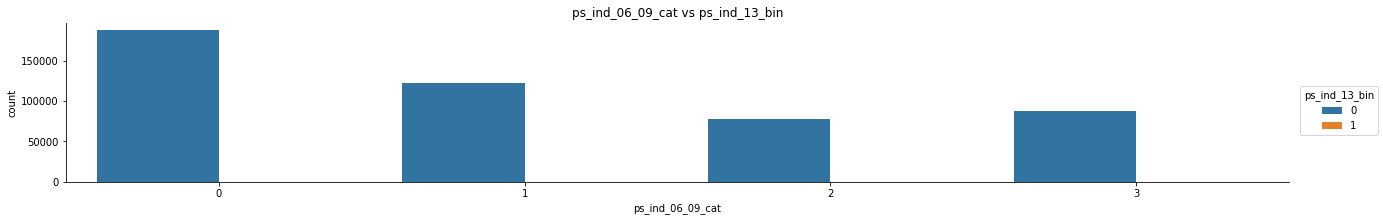

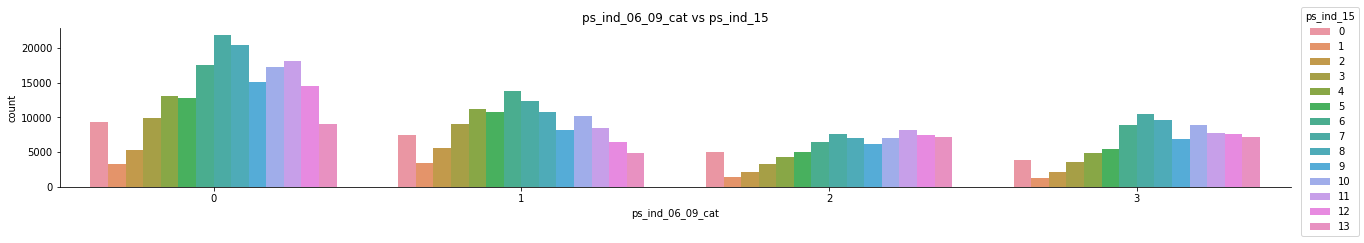

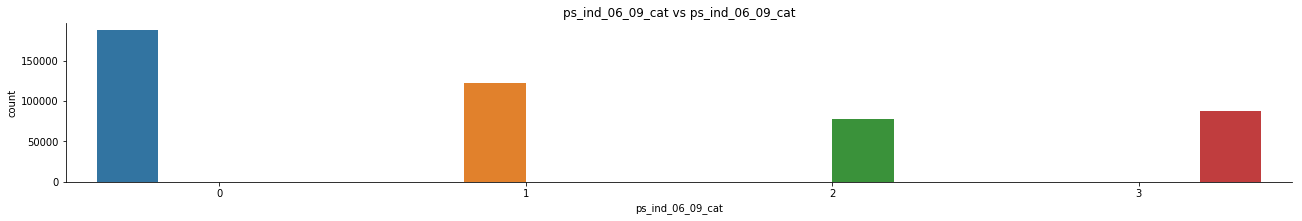

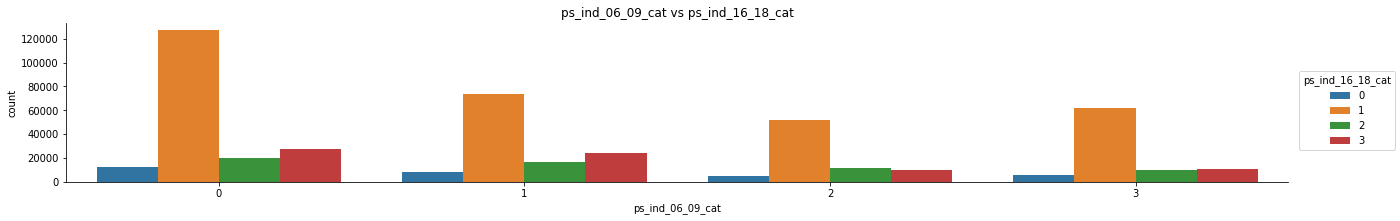

In [28]:
train.ps_ind_06_09_cat.hist()
plt.figure()
sns.barplot(x='ps_ind_06_09_cat', y='target', data=train)

for column in ind_columns:
    plt.figure()
    sns.factorplot(x='ps_ind_06_09_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_ind_06_09_cat vs ' + column)
    plt.show()

### ps_ind_10...ps_ind_13

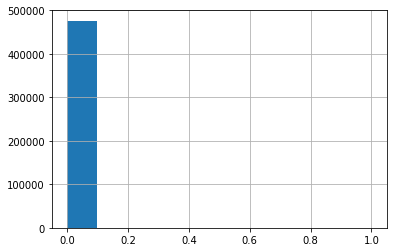

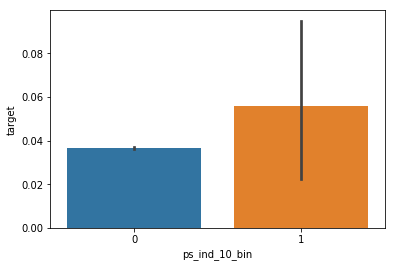

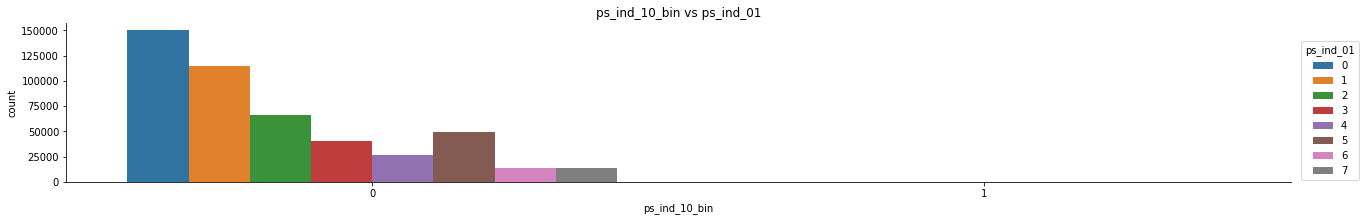

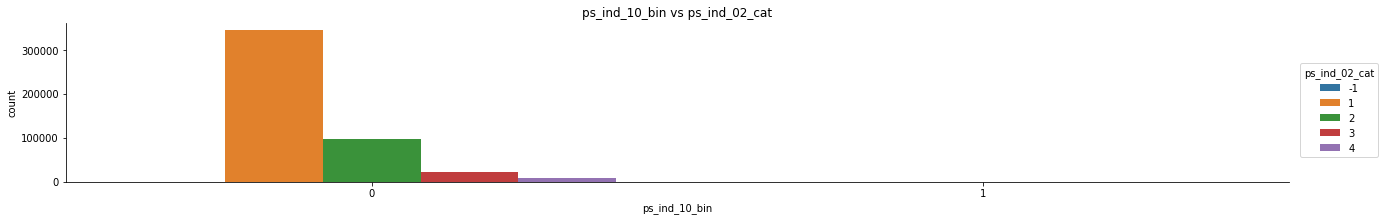

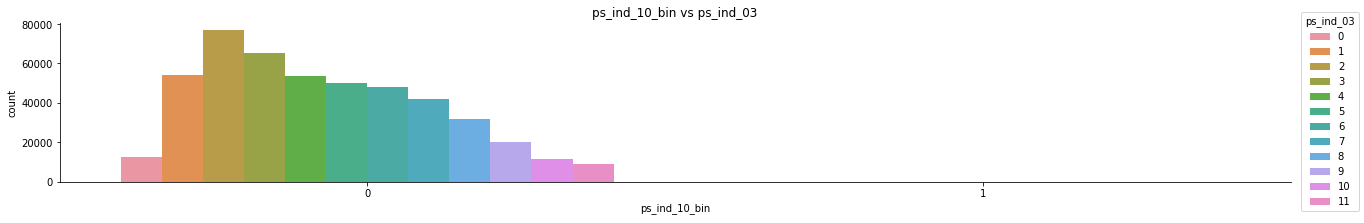

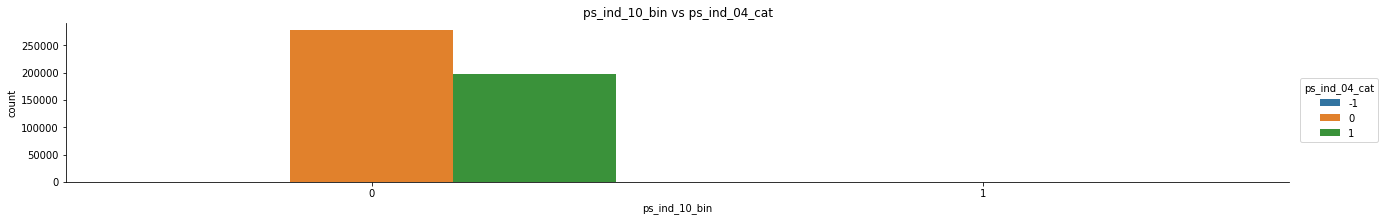

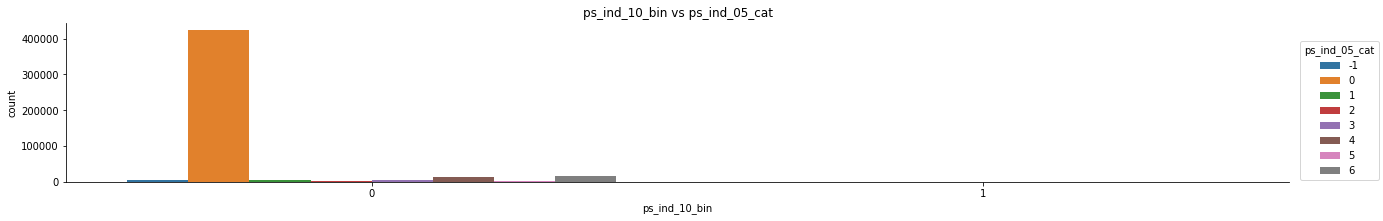

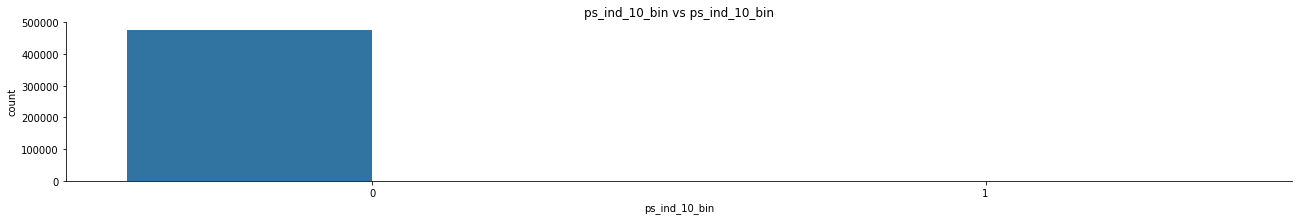

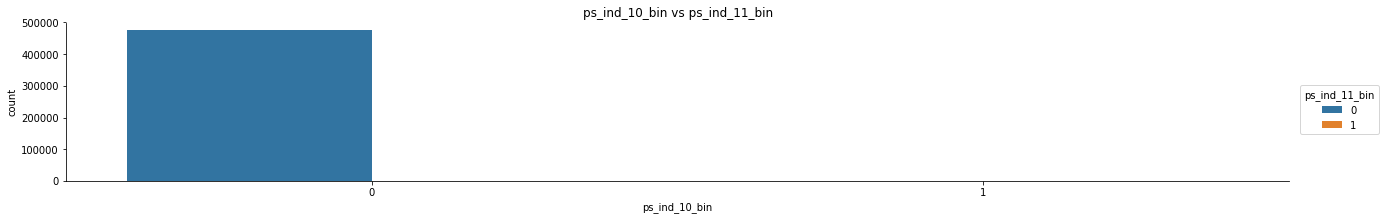

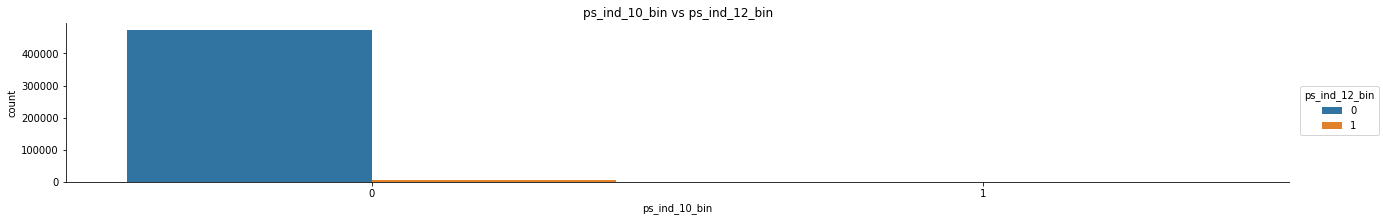

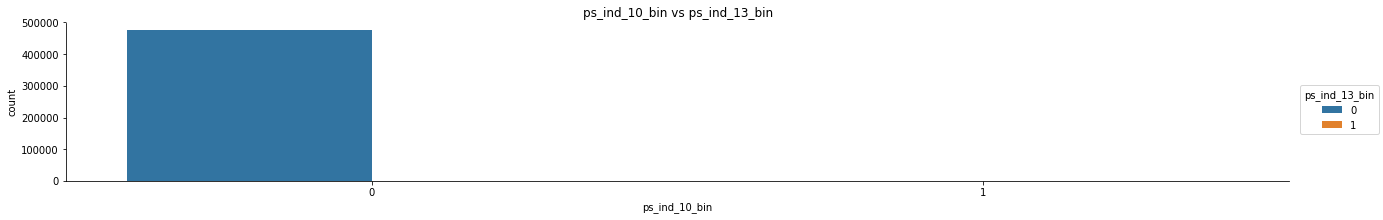

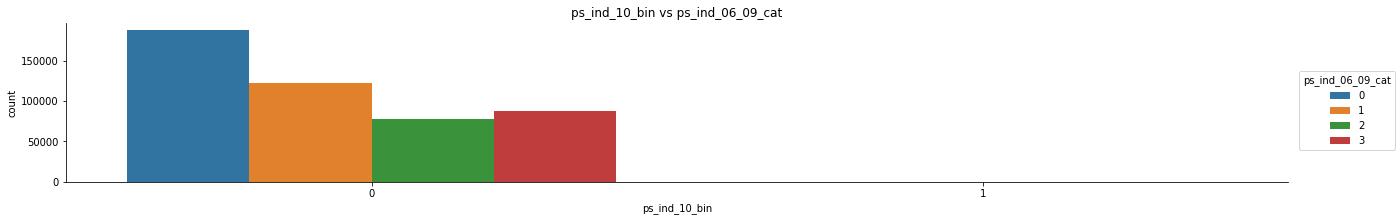

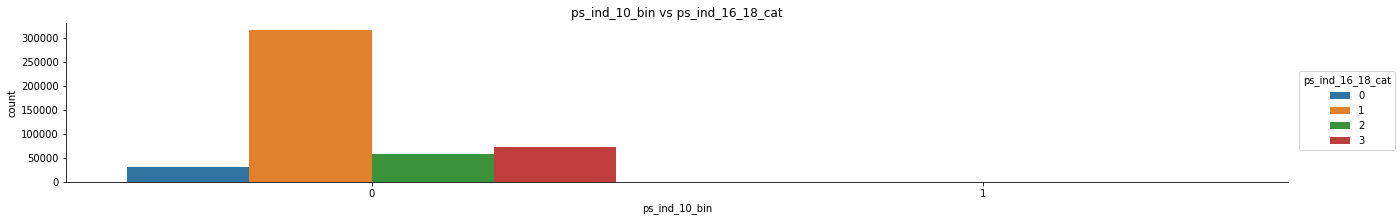

In [29]:
train.ps_ind_10_bin.hist()
plt.figure()
sns.barplot(x='ps_ind_10_bin', y='target', data=train)

for column in ind_columns:
    plt.figure()
    sns.factorplot(x='ps_ind_10_bin', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_ind_10_bin vs ' + column)
    plt.show()

### ps_ind_15

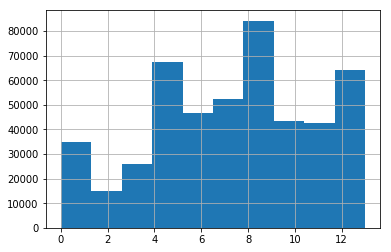

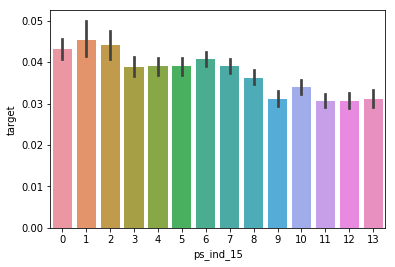

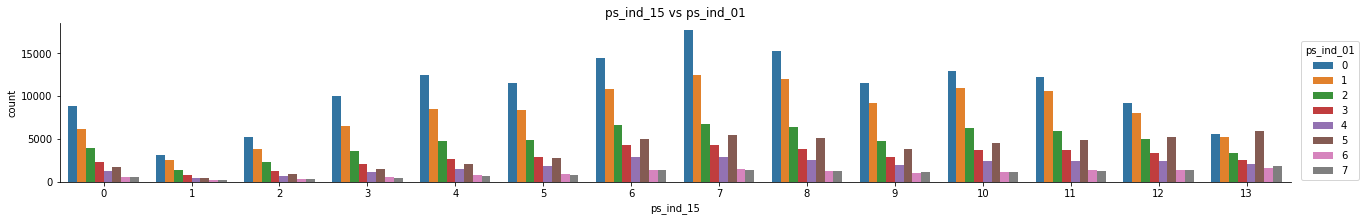

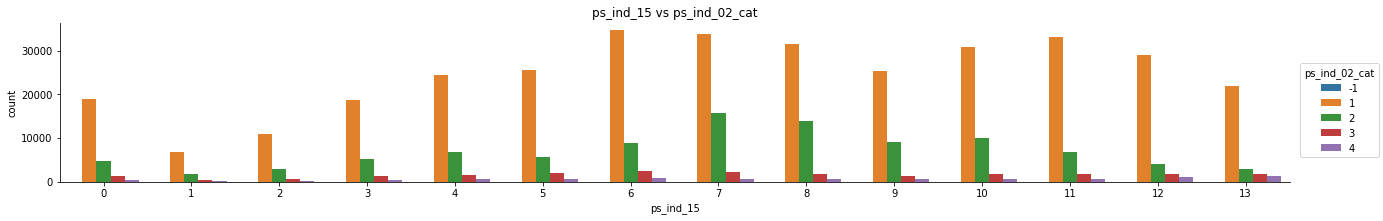

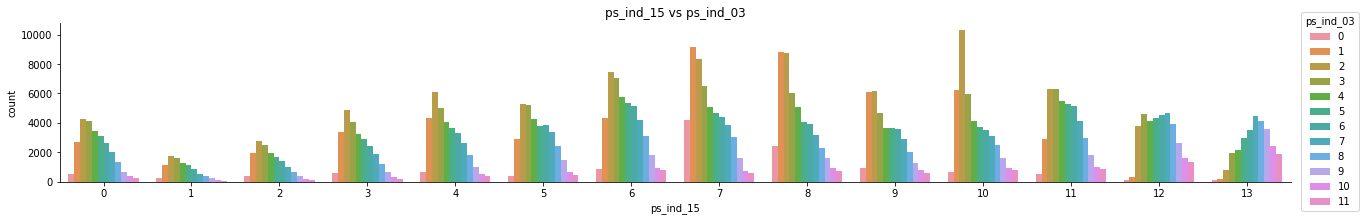

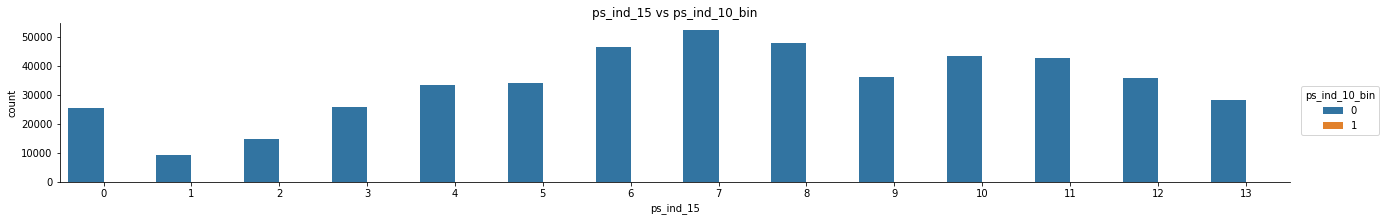

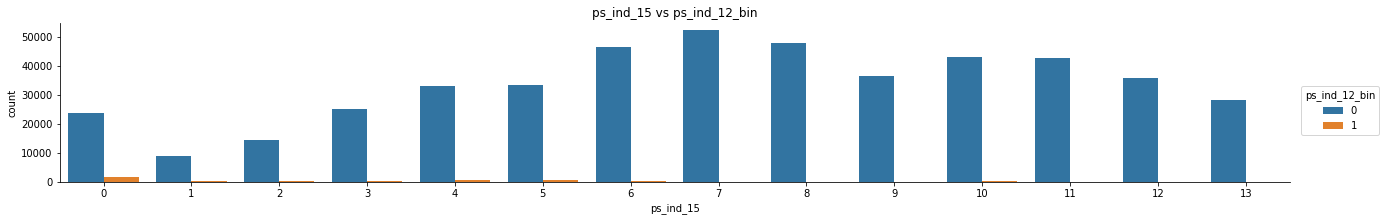

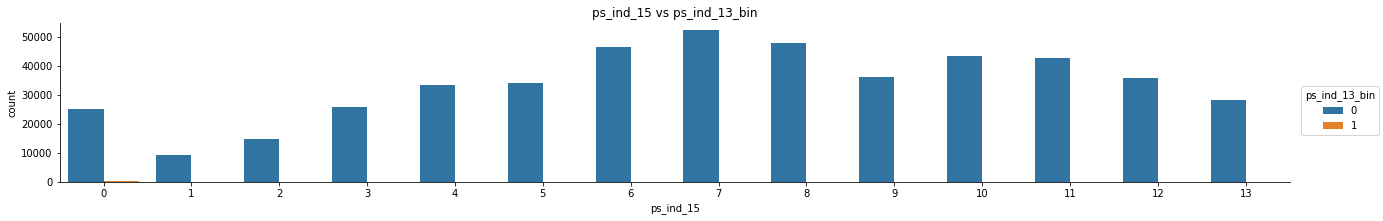

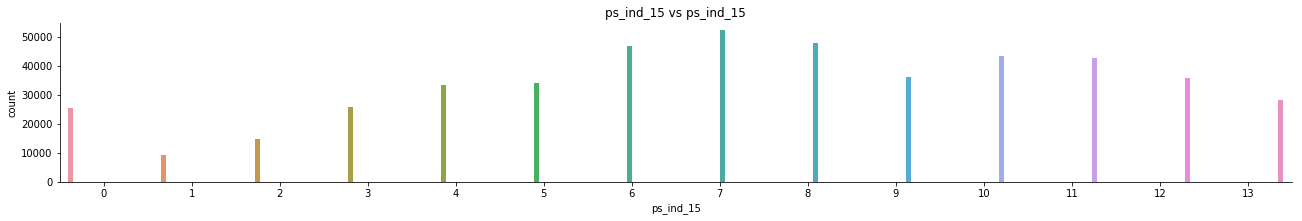

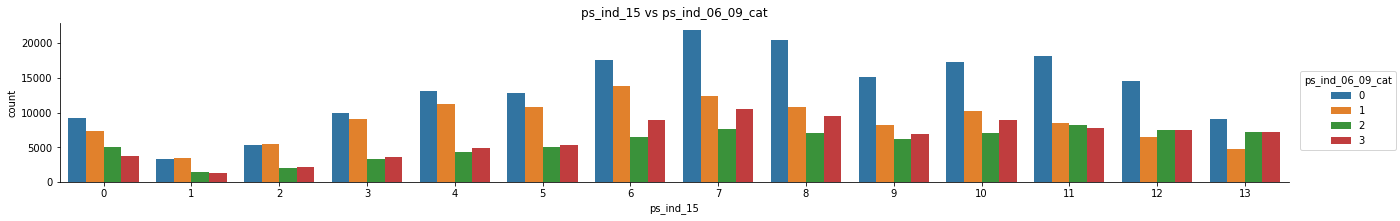

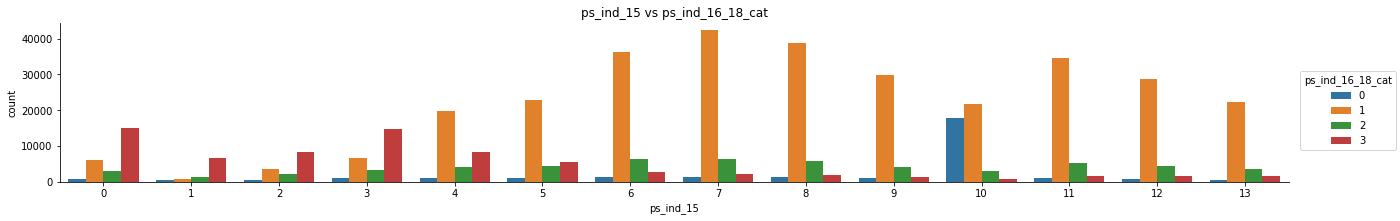

In [30]:
train.ps_ind_15.hist()
plt.figure()
sns.barplot(x='ps_ind_15', y='target', data=train)

for column in ind_columns:
    plt.figure()
    sns.factorplot(x='ps_ind_15', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_ind_15 vs ' + column)
    plt.show()

### ps_ind_16_18_cat
Something:
* Weird relationship with ps_ind_15 and ps_ind_03

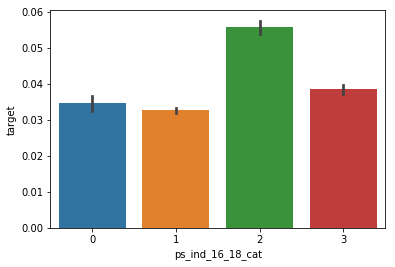

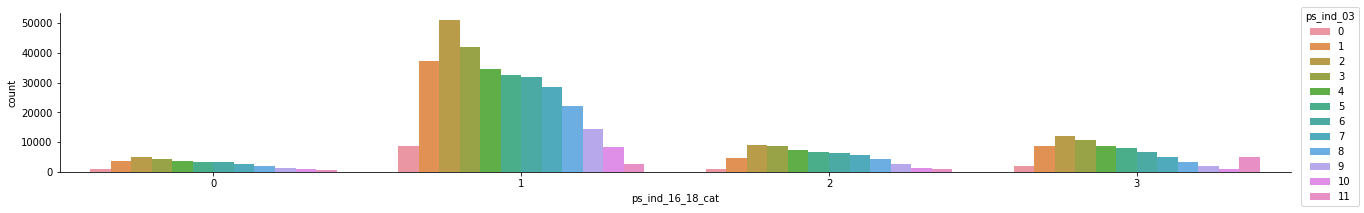

In [31]:
train.ps_ind_16_18_cat.hist()
plt.figure()
sns.barplot(x='ps_ind_16_18_cat', y='target', data=train)
sns.factorplot(x='ps_ind_16_18_cat', hue='ps_ind_15', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_16_18_cat', hue='ps_ind_03', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_ind_16_18_cat', hue='ps_ind_06_09_cat', data=train, kind='count', size=3, aspect=6)

### ps_car_01_cat

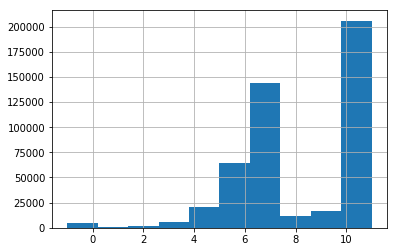

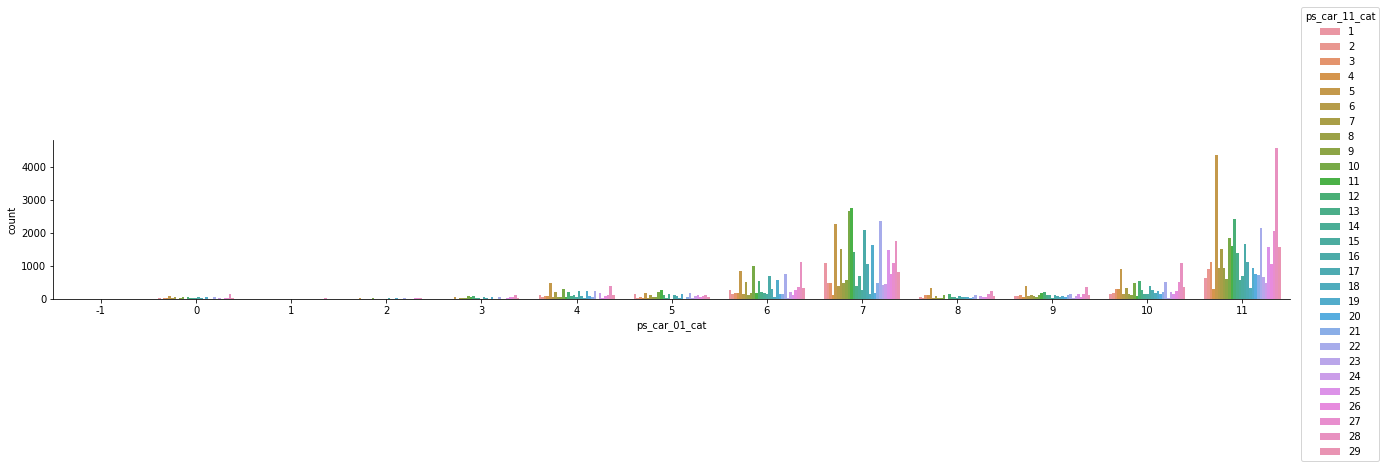

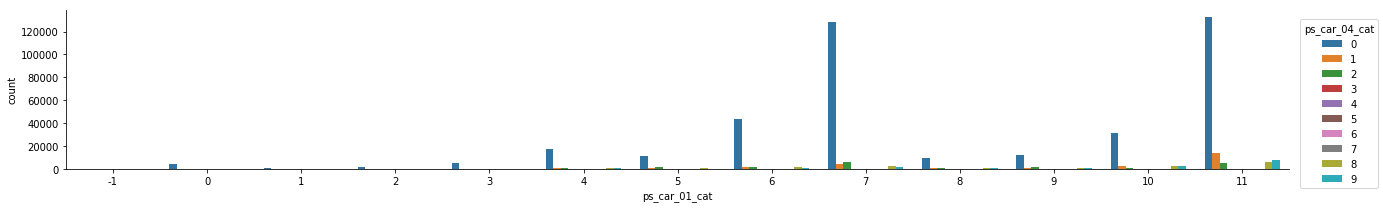

In [65]:
train.ps_car_01_cat.hist()
plt.figure()
sns.barplot(x='ps_car_01_cat', y='target', data=train[train.ps_car_01_cat > -1])
sns.factorplot(x='ps_car_01_cat', hue='ps_car_11_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_01_cat', hue='ps_car_02_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_01_cat', hue='ps_car_04_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_01_cat', hue='ps_car_06_cat', data=train, kind='count', size=3, aspect=6)

# for column in ind_columns:
#     plt.figure()
#     sns.factorplot(x='ps_car_01_cat', hue=column, data=train, kind='count', size=3, aspect=6)
#     plt.show()
#     plt.figure()
#     sns.factorplot(x=column, hue='ps_car_01_cat', data=train, kind='count', size=3, aspect=6)
#     plt.show()
#     # plt.title('ps_car_01_cat vs ' + column)
#     # plt.show()

### (Imported/Domestic) ps_car_02_cat
Was the car imported or produced domestically:
* Ratio seems to correlate with external sources
* Depends on a model

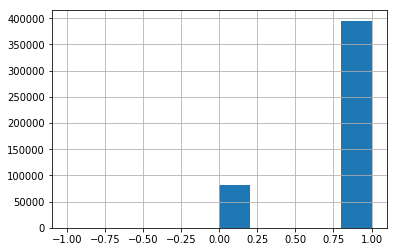

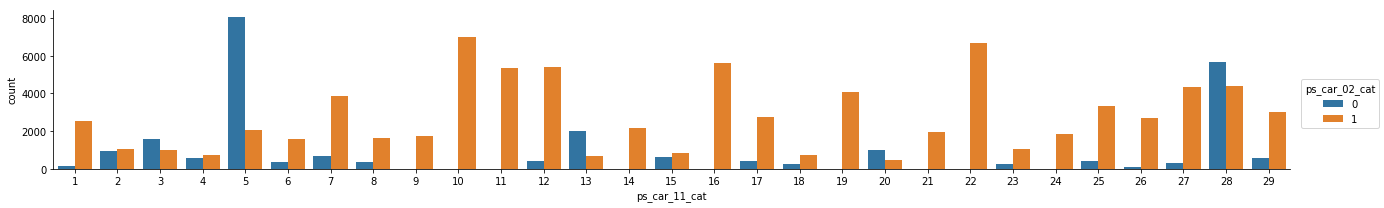

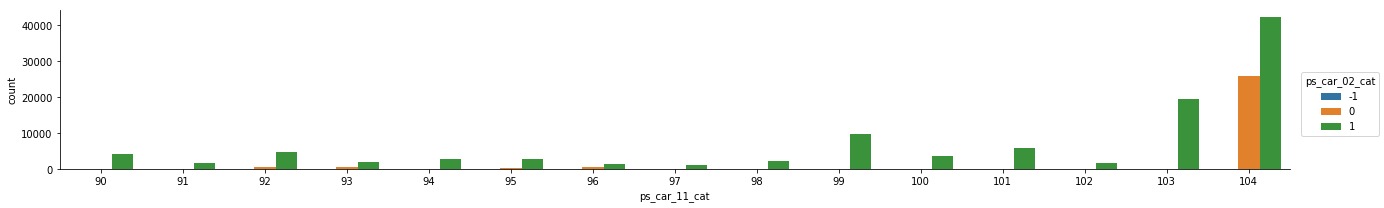

In [33]:
train.ps_car_02_cat.hist()
plt.figure()
sns.barplot(x='ps_car_02_cat', y='target', data=train)

sns.factorplot(x='ps_car_11_cat', hue='ps_car_02_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_11_cat', hue='ps_car_02_cat', data=train[train.ps_car_11_cat.isin(range(90, 105))], kind='count', size=3, aspect=6)

### ps_car_03_cat

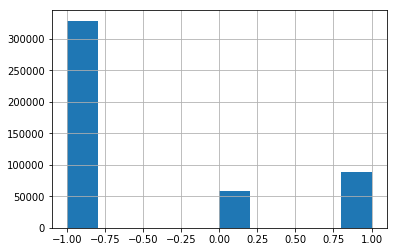

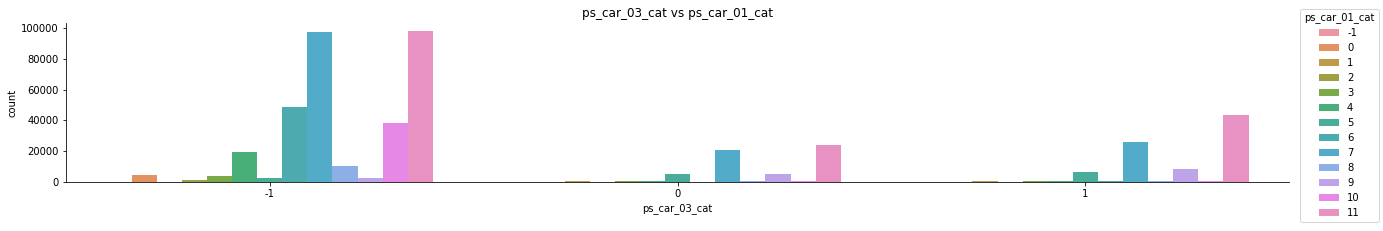

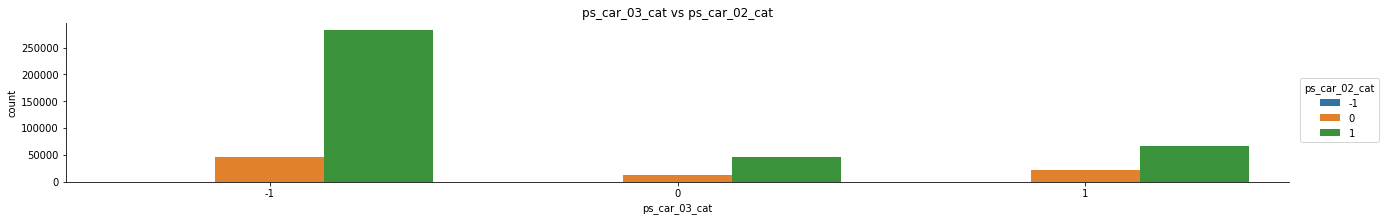

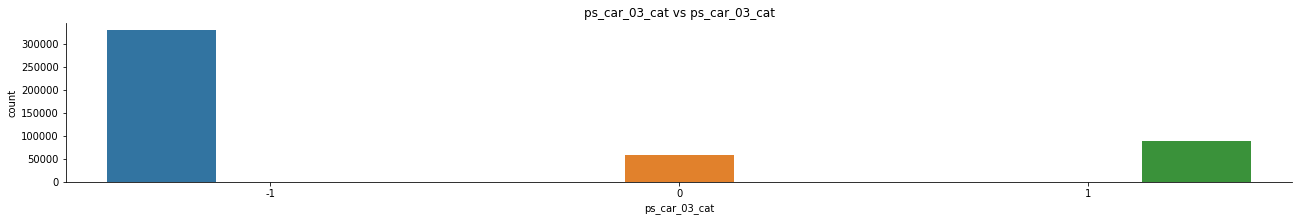

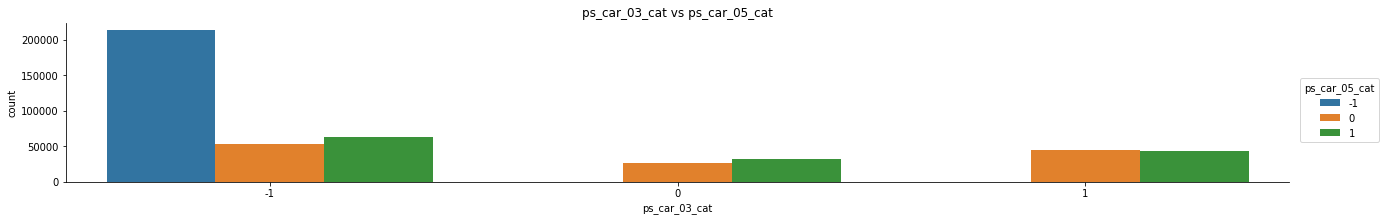

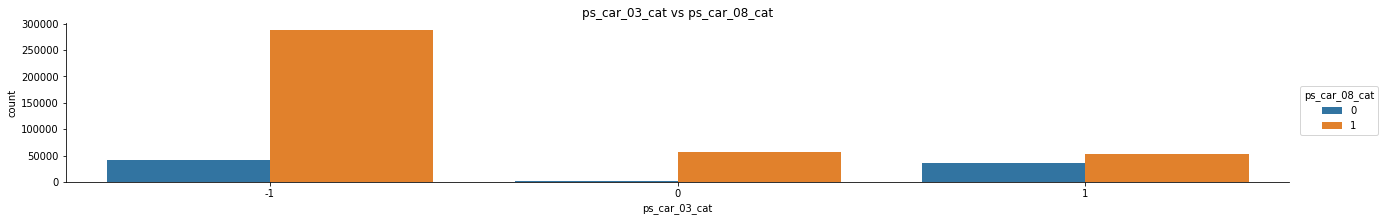

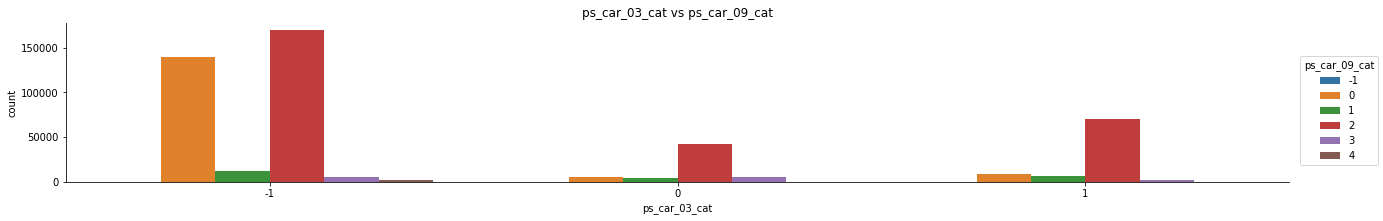

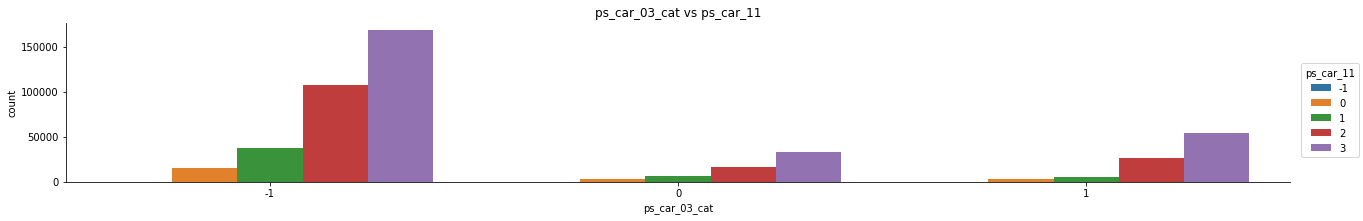

In [34]:
train.ps_car_03_cat.hist()
plt.figure()
sns.barplot(x='ps_car_03_cat', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_car_03_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_car_03_cat vs ' + column)
    plt.show()

### (Form factor) ps_car_04_cat
Form factor (sedan, hatchback and etc.) of the car:
* One-to-many with ps_car_11_cat
* Limits ps_car_11

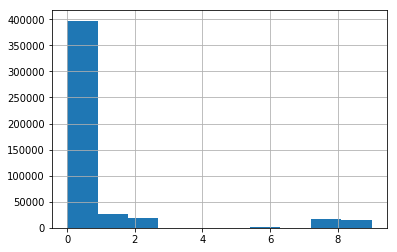

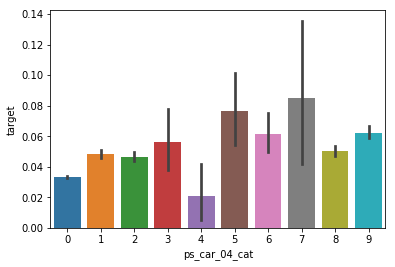

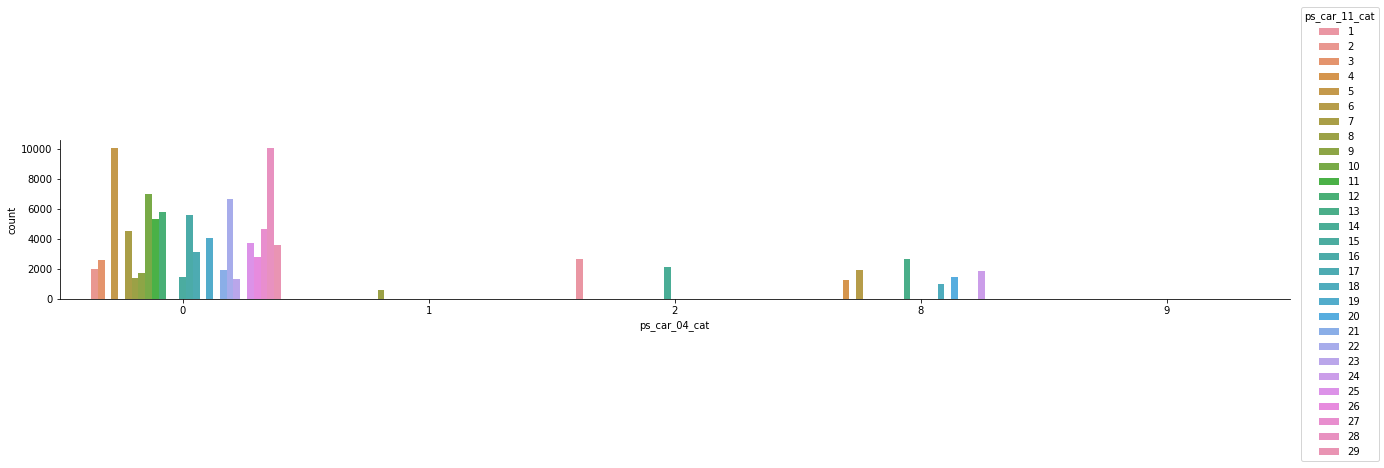

In [35]:
train.ps_car_04_cat.hist()
plt.figure()
sns.barplot(x='ps_car_04_cat', y='target', data=train)
sns.factorplot(x='ps_car_04_cat', hue='ps_car_11_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_04_cat', hue='ps_car_11', data=train, kind='count', size=3, aspect=6)

### ps_car_05_cat

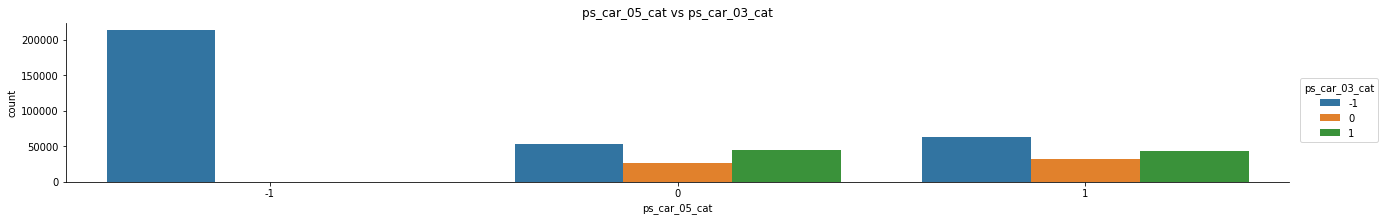

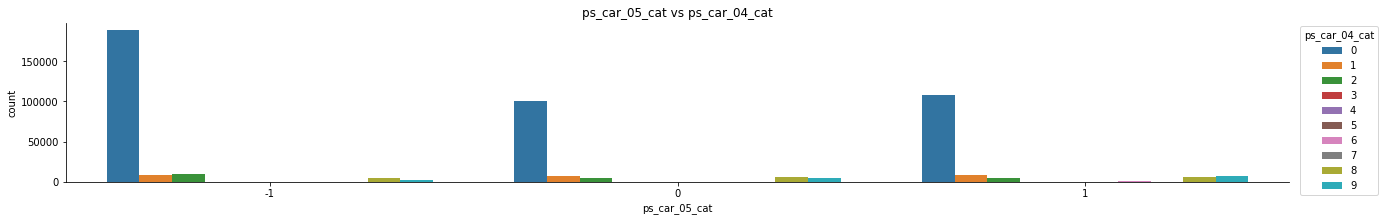

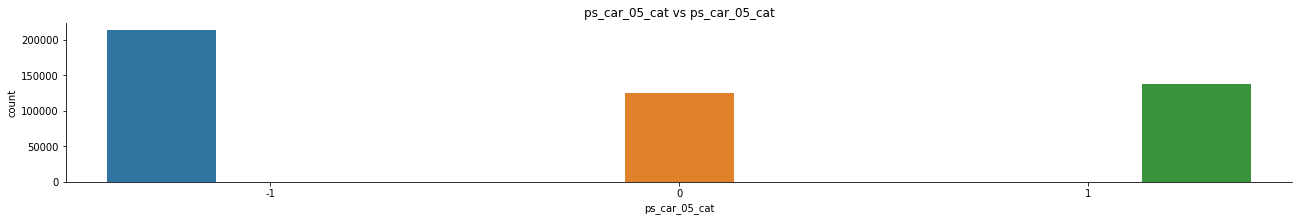

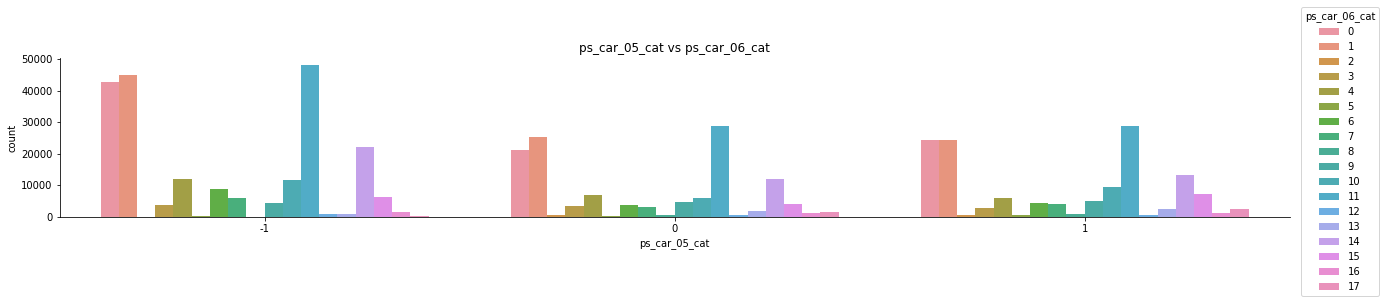

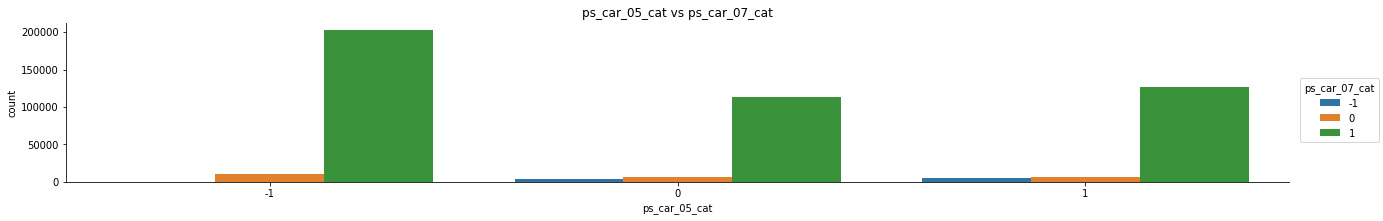

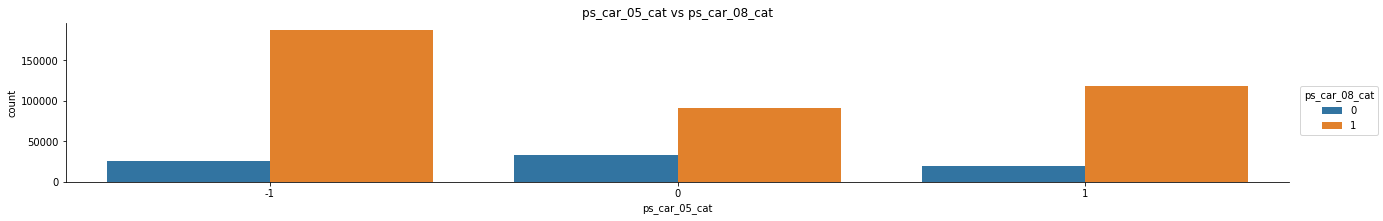

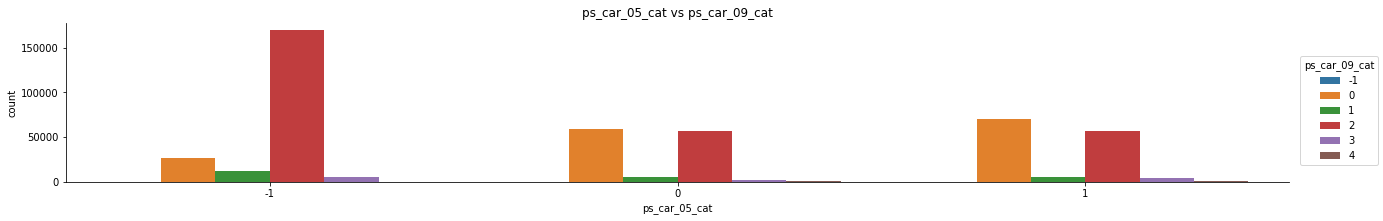

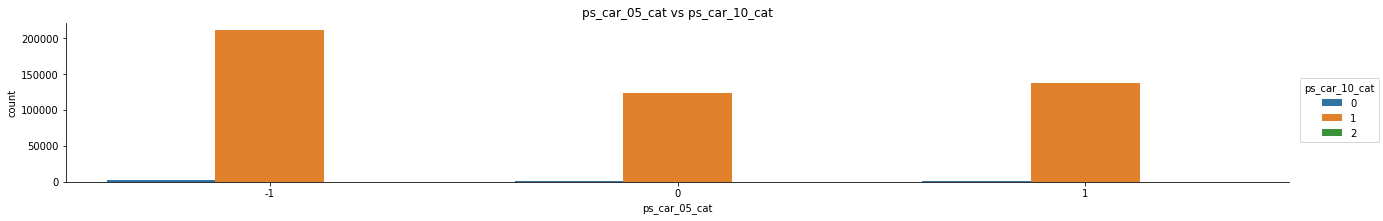

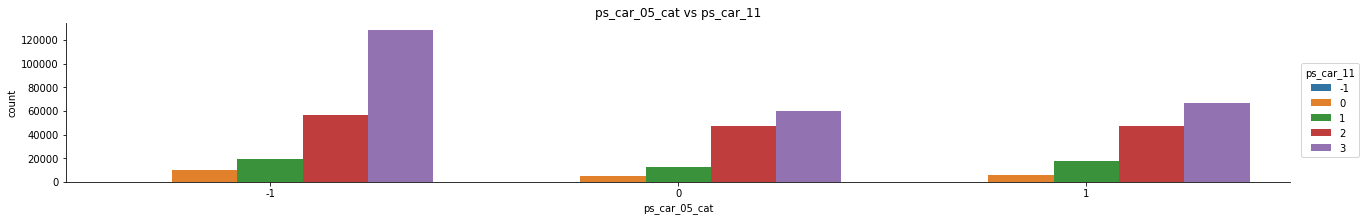

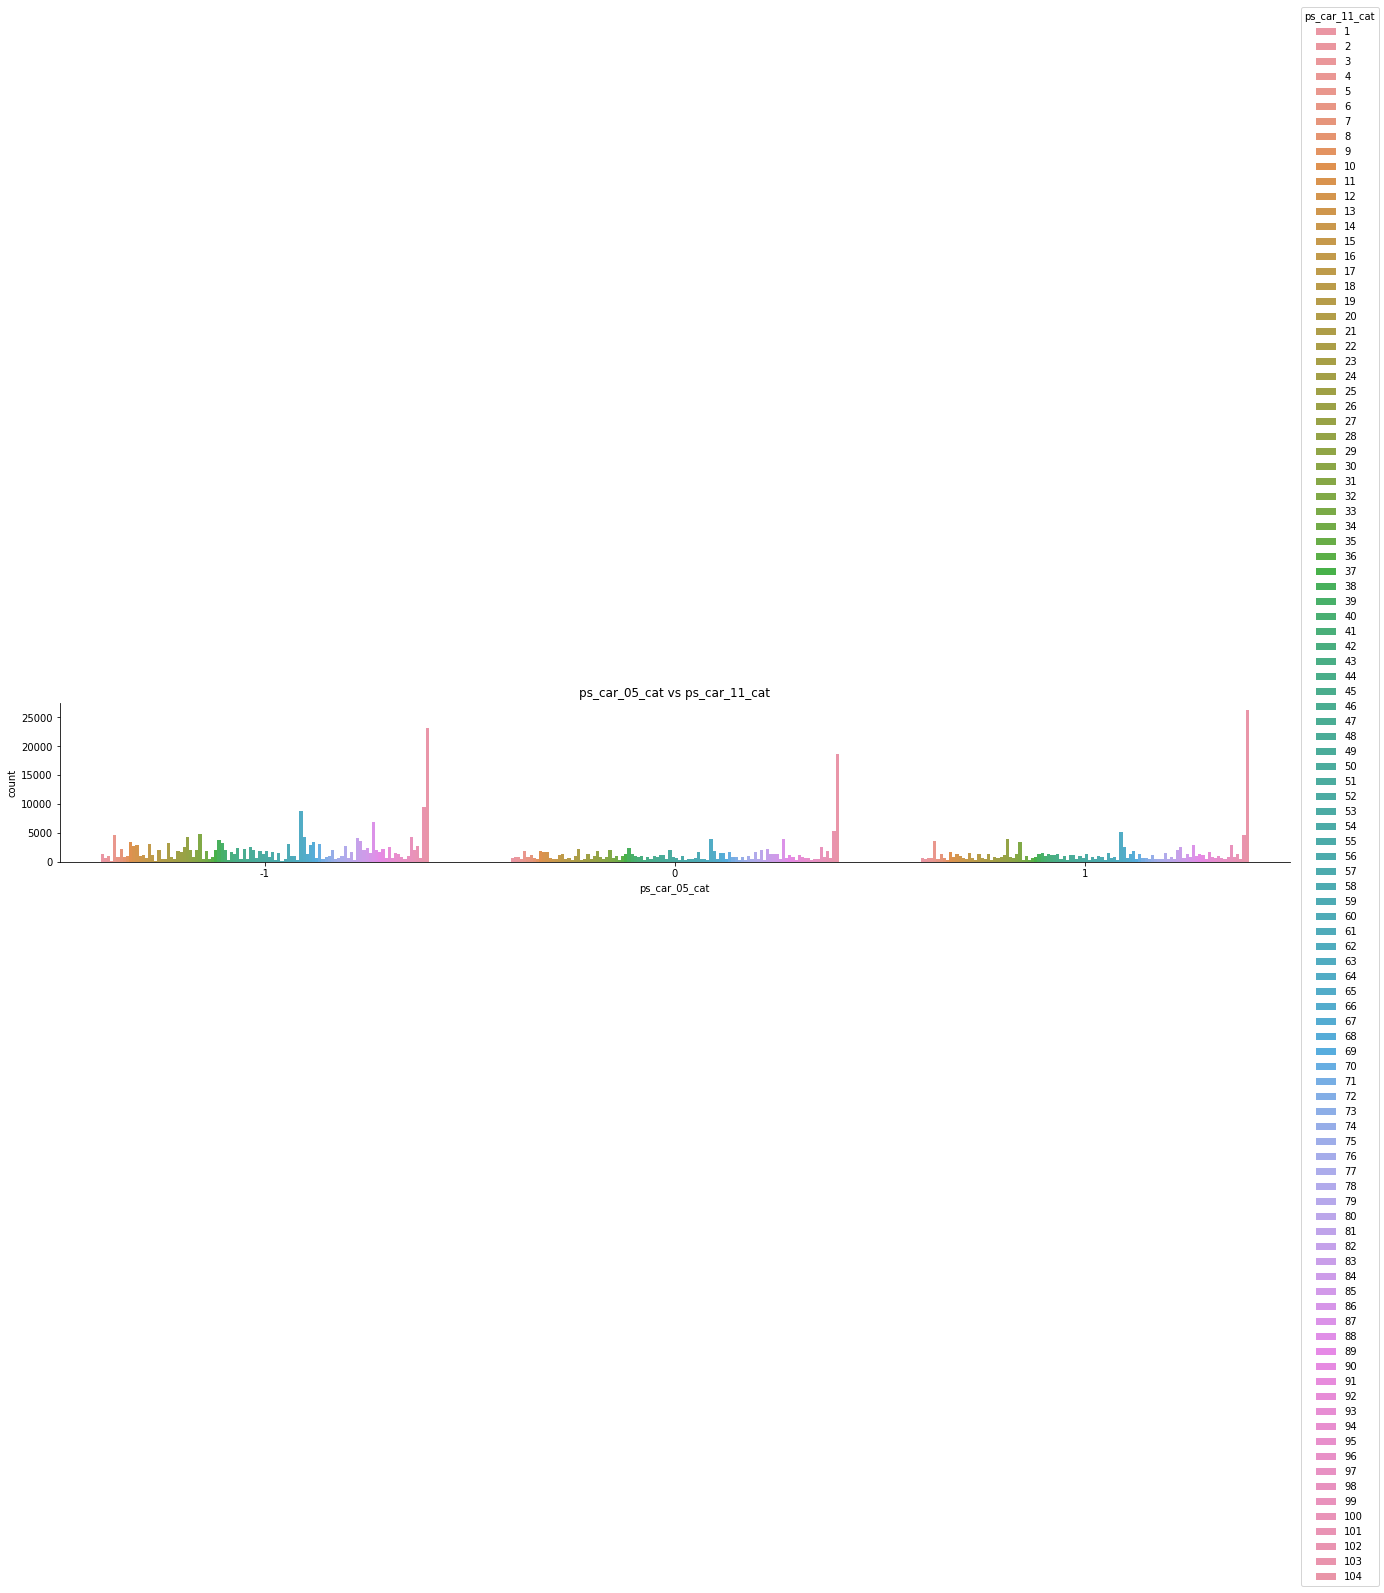

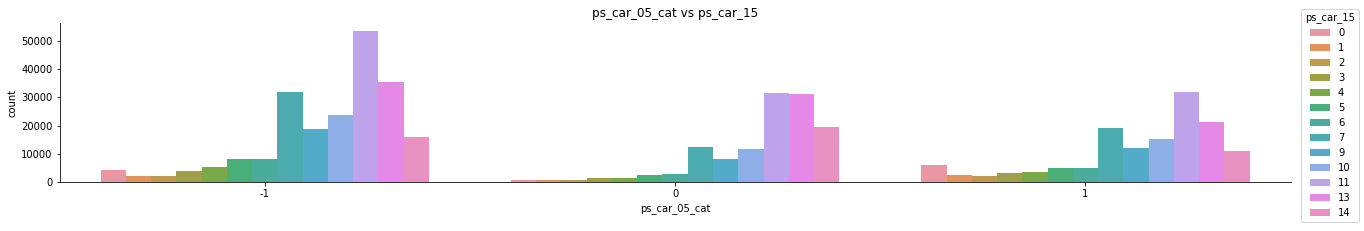

In [36]:
train.ps_car_05_cat.hist()
plt.figure()
sns.barplot(x='ps_car_05_cat', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_car_05_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_car_05_cat vs ' + column)
    plt.show()

### (Manufacturer) ps_car_06_cat
Manufacturer of the car:
* One-to-many relationship with ps_car_11_cat

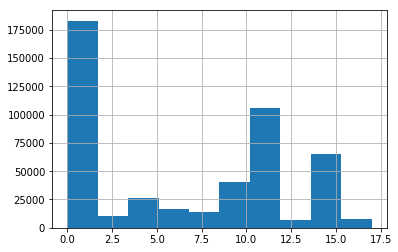

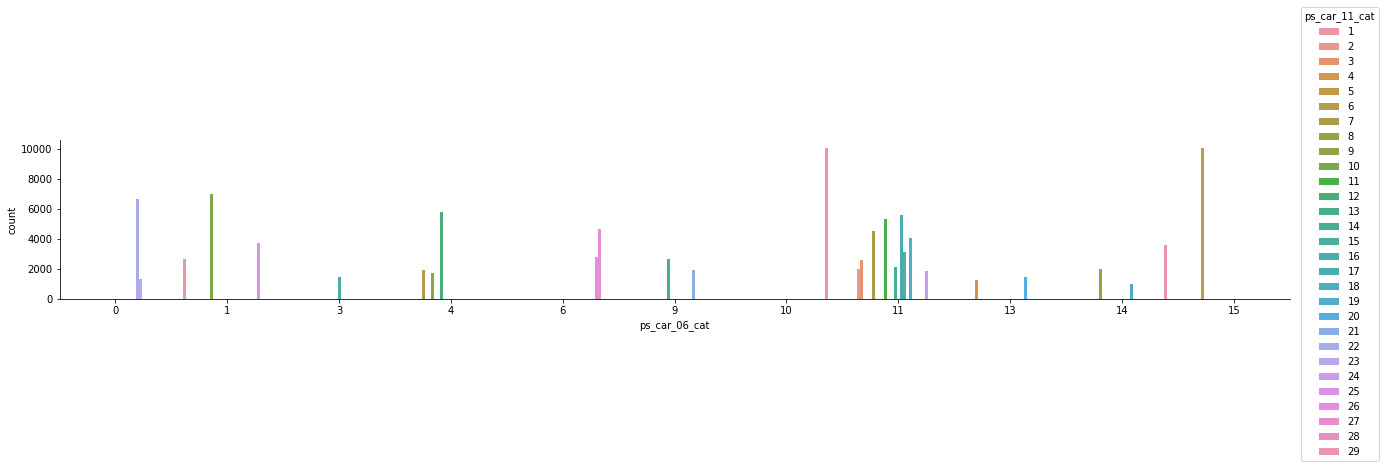

In [37]:
train.ps_car_06_cat.hist()
plt.figure()
sns.barplot(x='ps_car_06_cat', y='target', data=train)
sns.factorplot(x='ps_car_06_cat', hue='ps_car_11_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)

### ps_car_07_cat

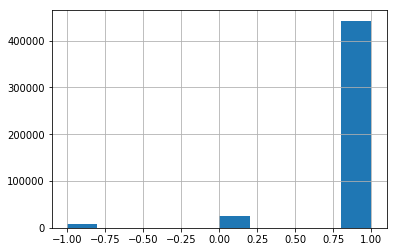

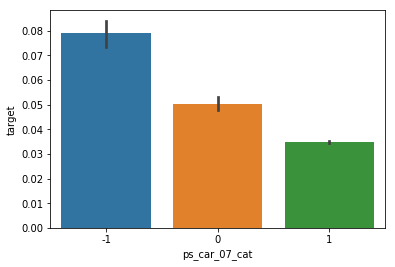

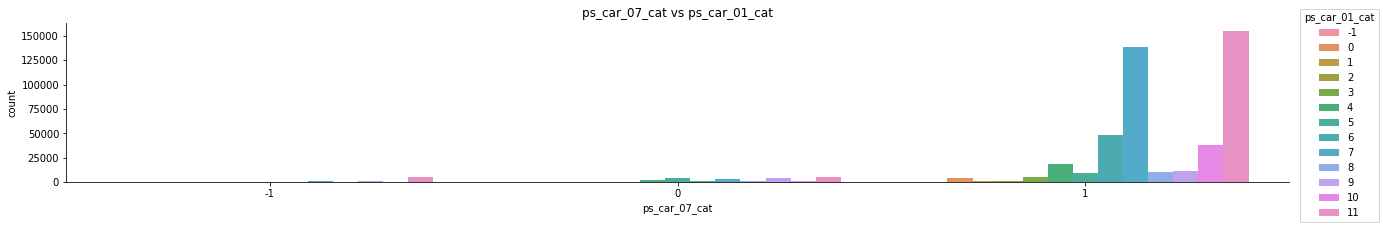

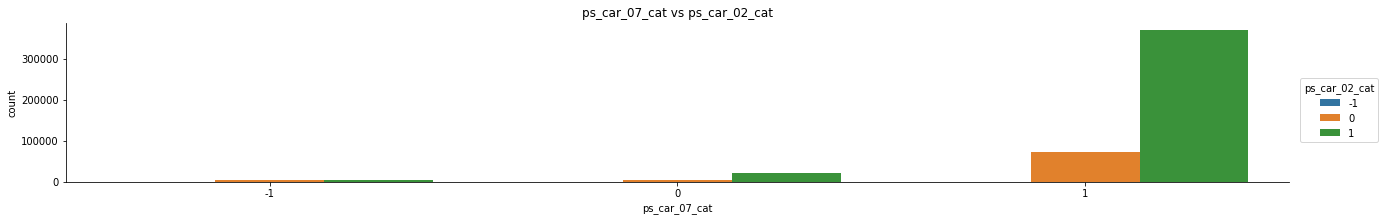

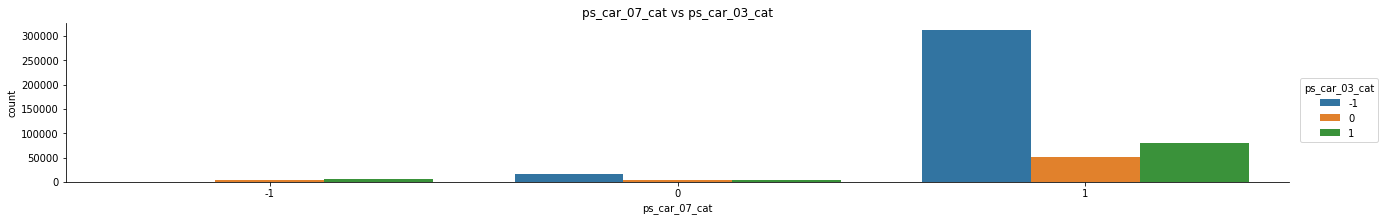

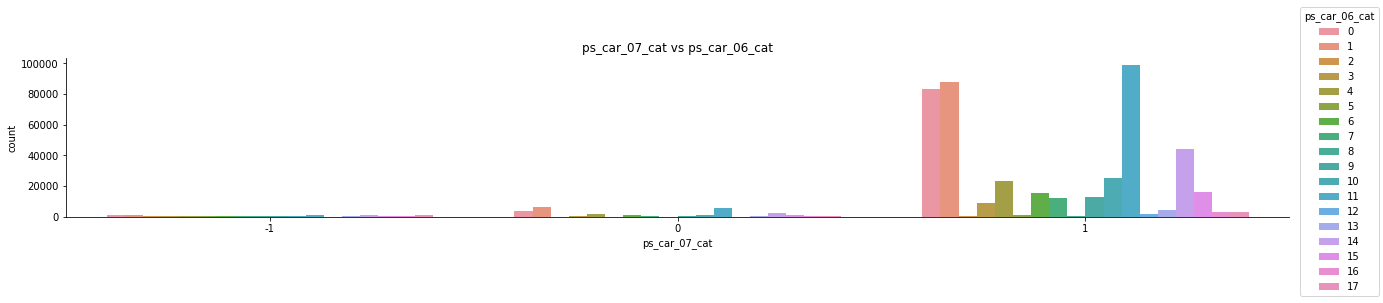

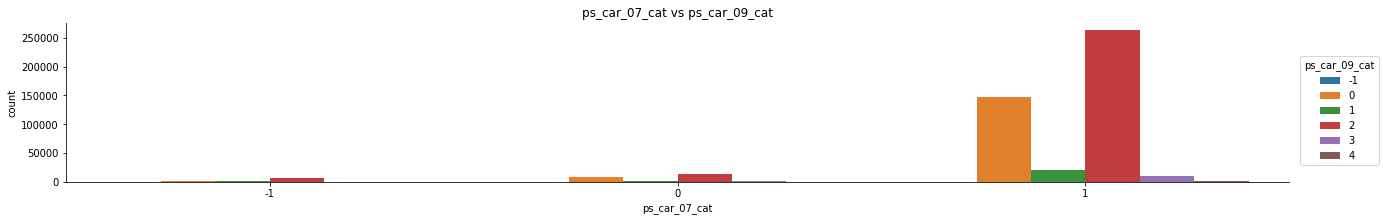

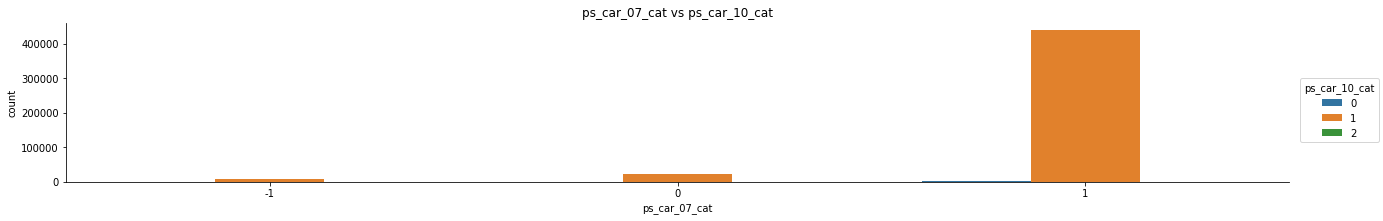

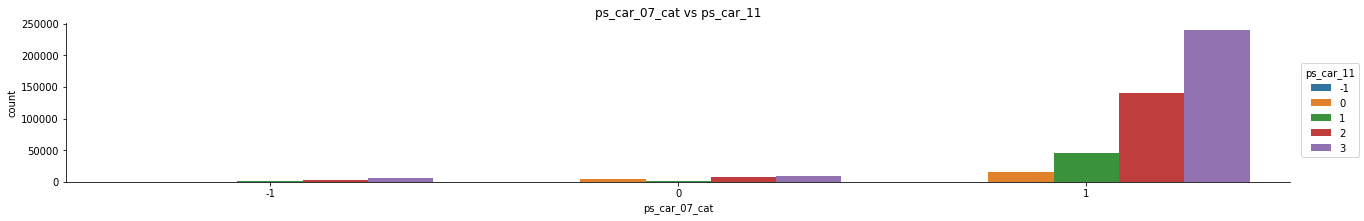

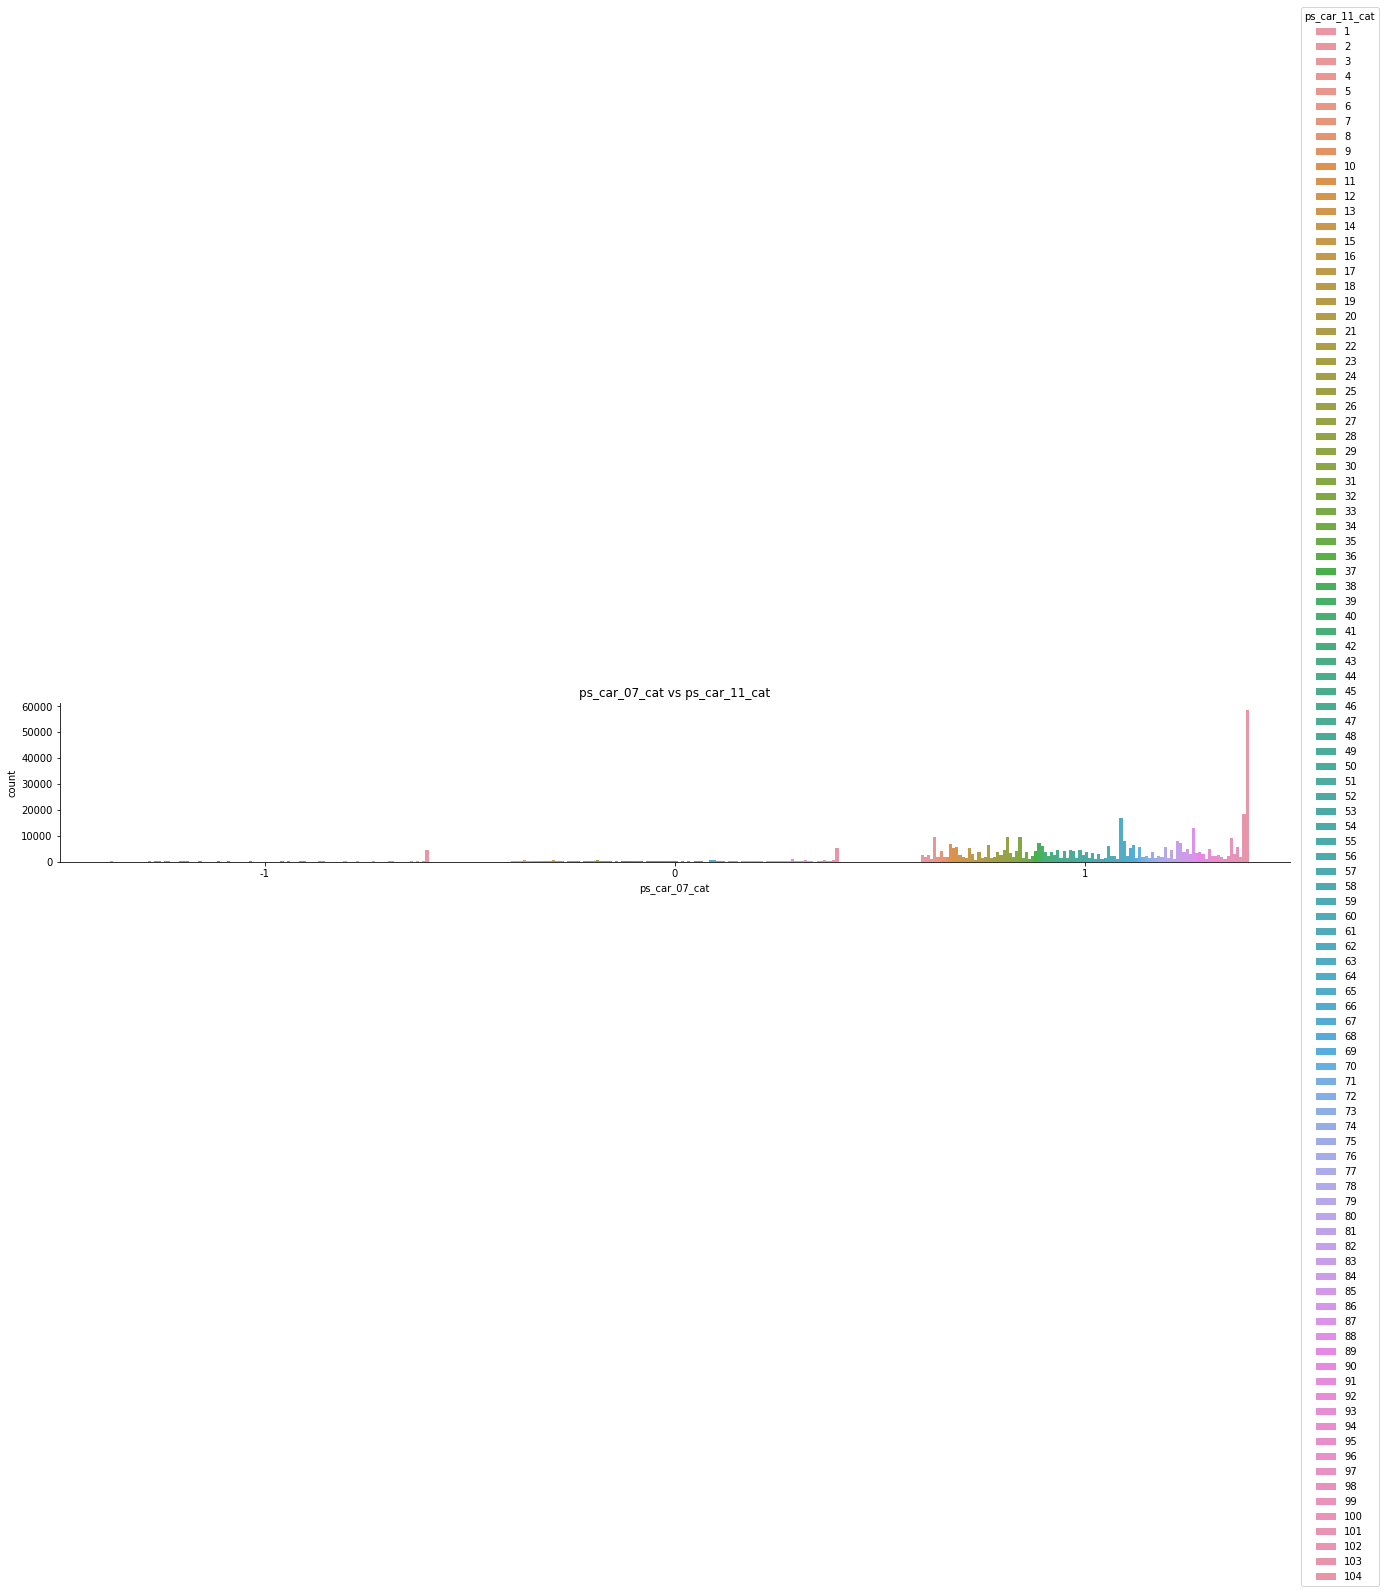

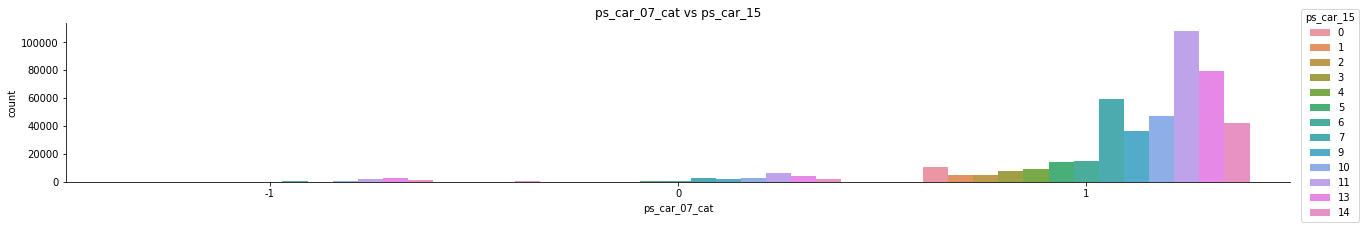

In [38]:
train.ps_car_07_cat.hist()
plt.figure()
sns.barplot(x='ps_car_07_cat', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_car_07_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_car_07_cat vs ' + column)
    plt.show()

### (New/Old) ps_car_08_cat
Is the car new (0) or old (1):
* Equal to 0 for highest ps_car_15 levels

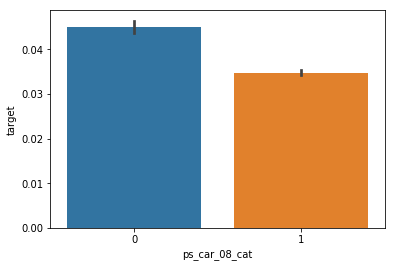

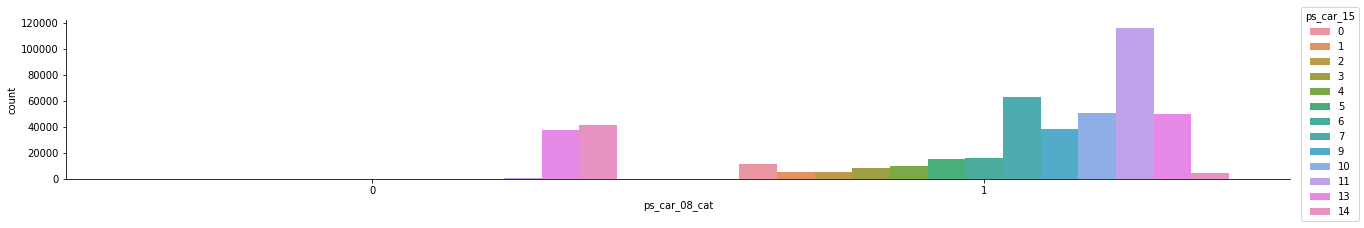

In [39]:
train.ps_car_08_cat.hist()
plt.figure()
sns.barplot(x='ps_car_08_cat', y='target', data=train)
sns.factorplot(x='ps_car_08_cat', hue='ps_car_15', data=train, kind='count', size=3, aspect=6)

### ps_car_09_cat

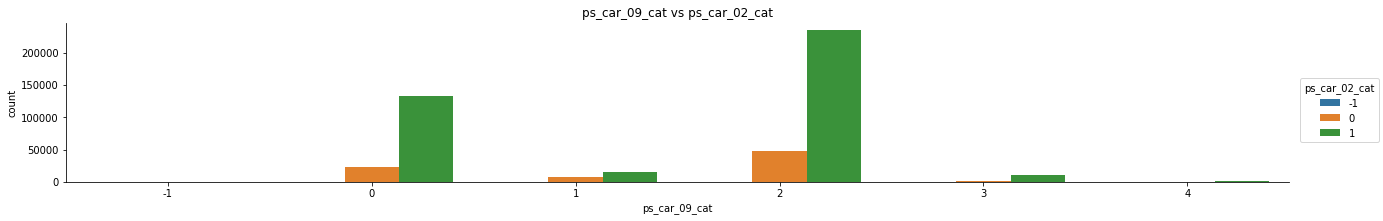

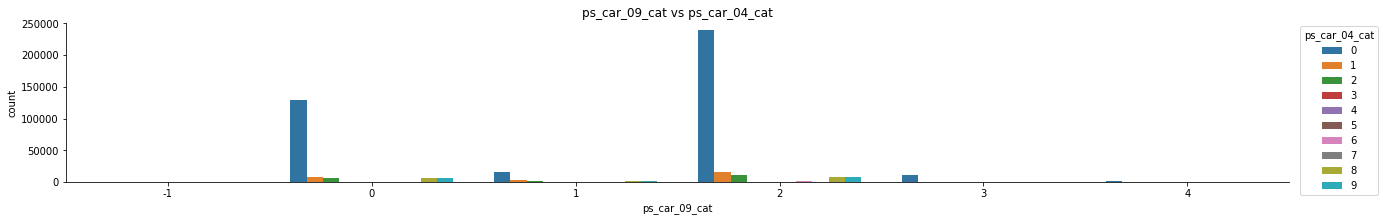

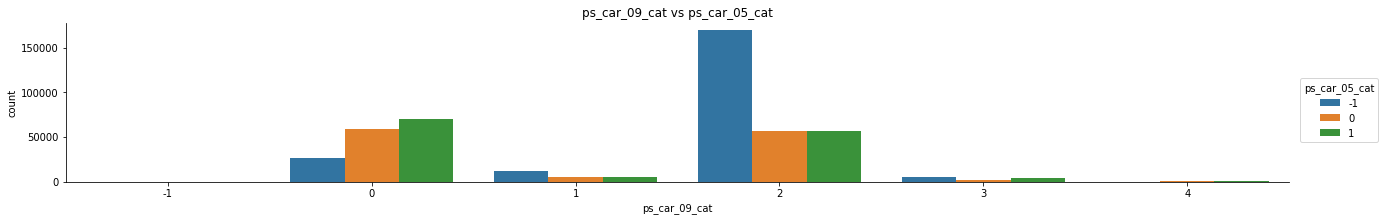

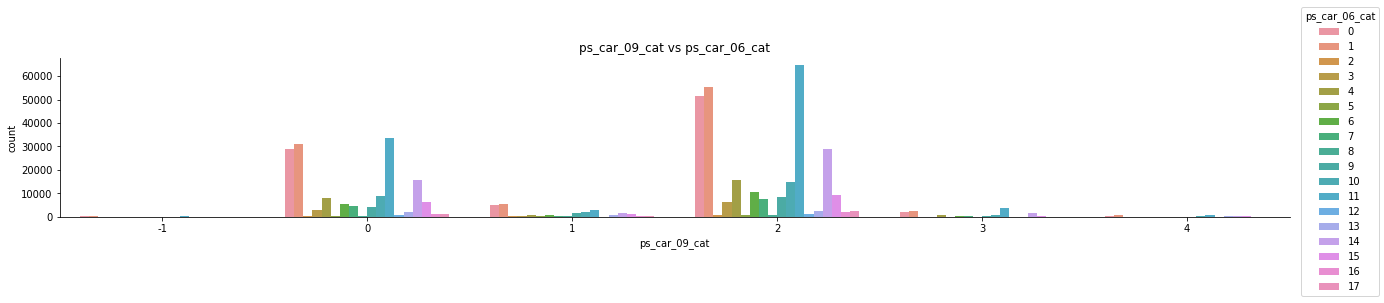

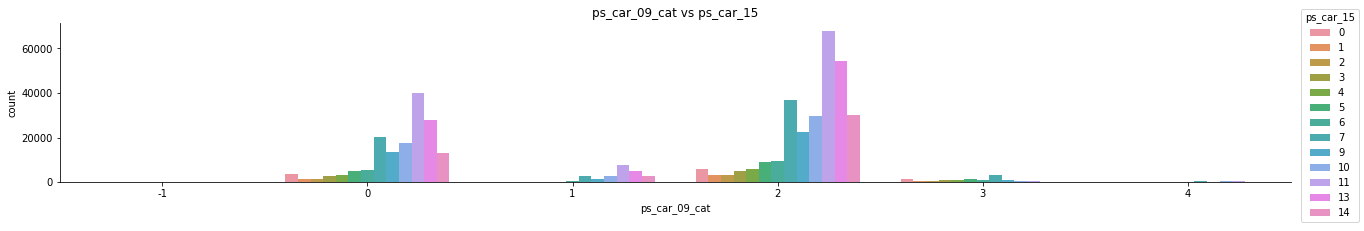

In [40]:
train.ps_car_09_cat.hist()
plt.figure()
sns.barplot(x='ps_car_09_cat', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_car_09_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_car_09_cat vs ' + column)
    plt.show()

### ps_car_10_cat

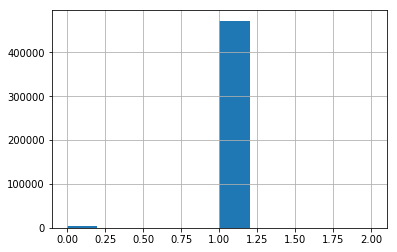

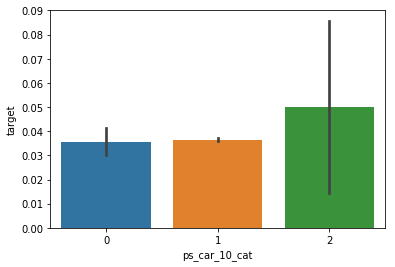

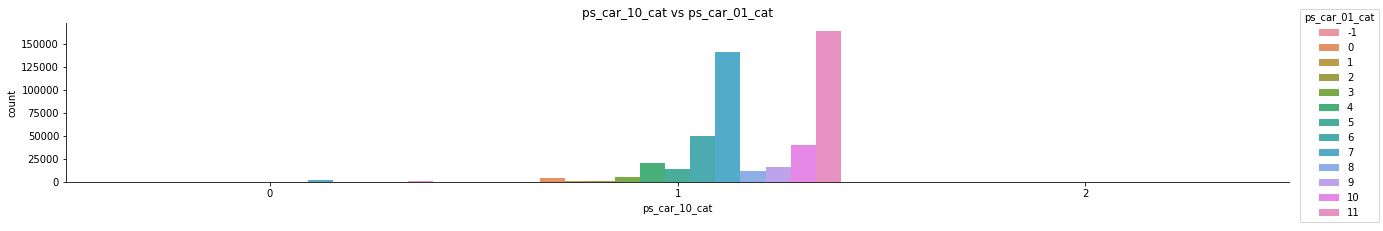

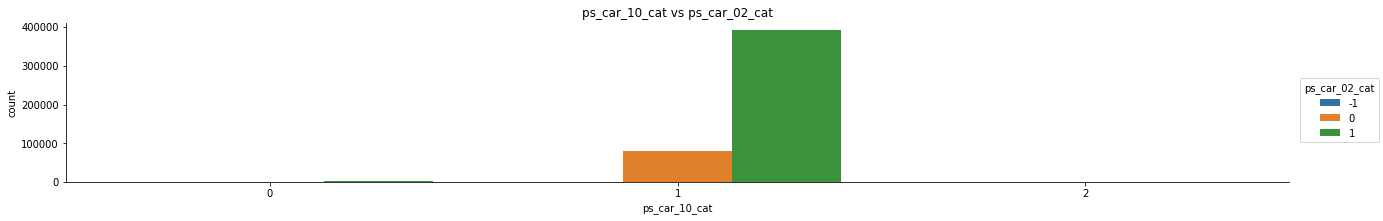

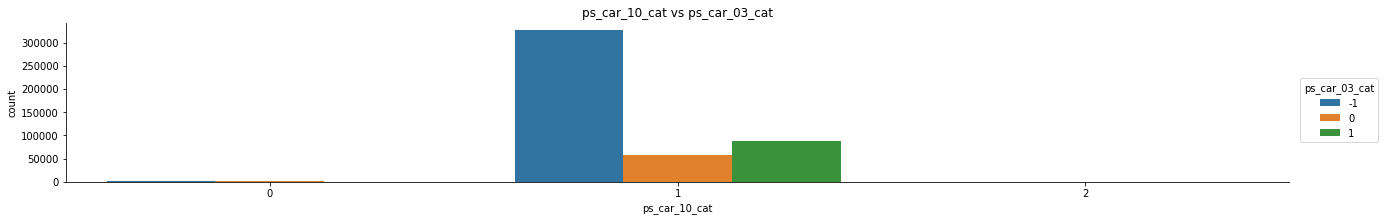

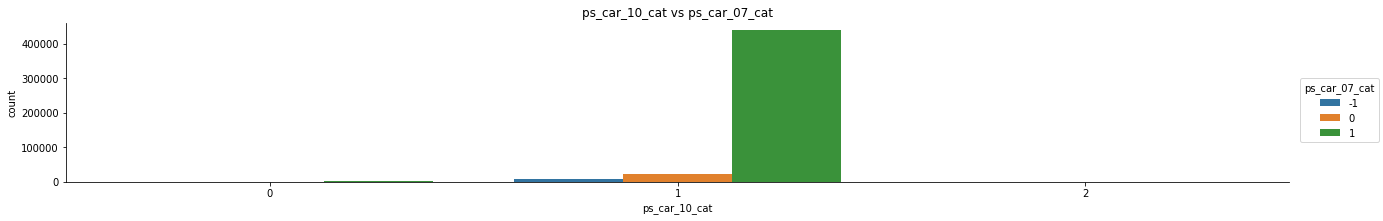

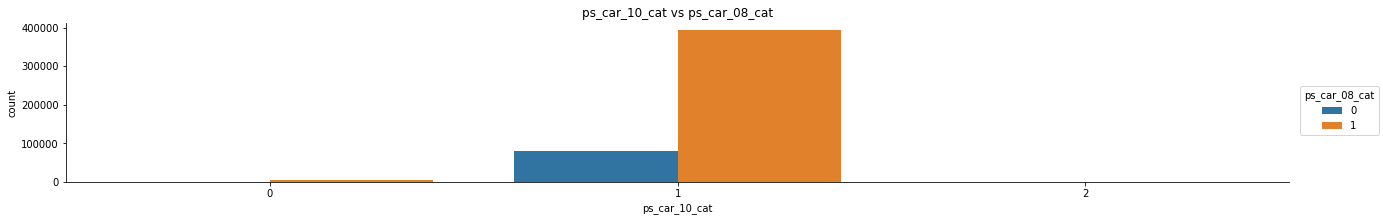

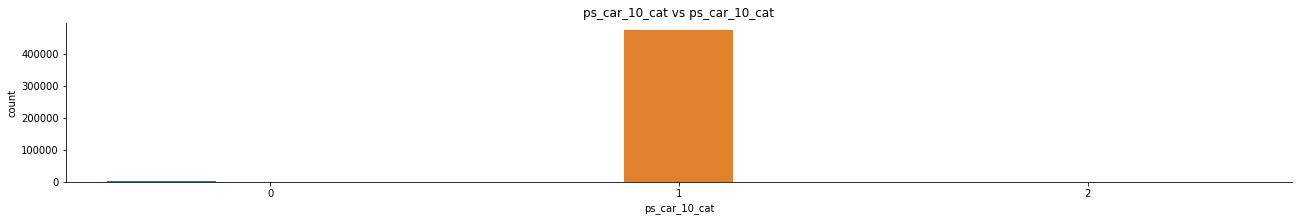

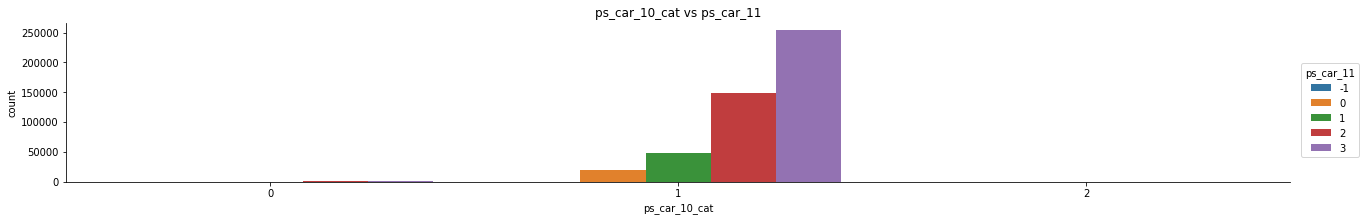

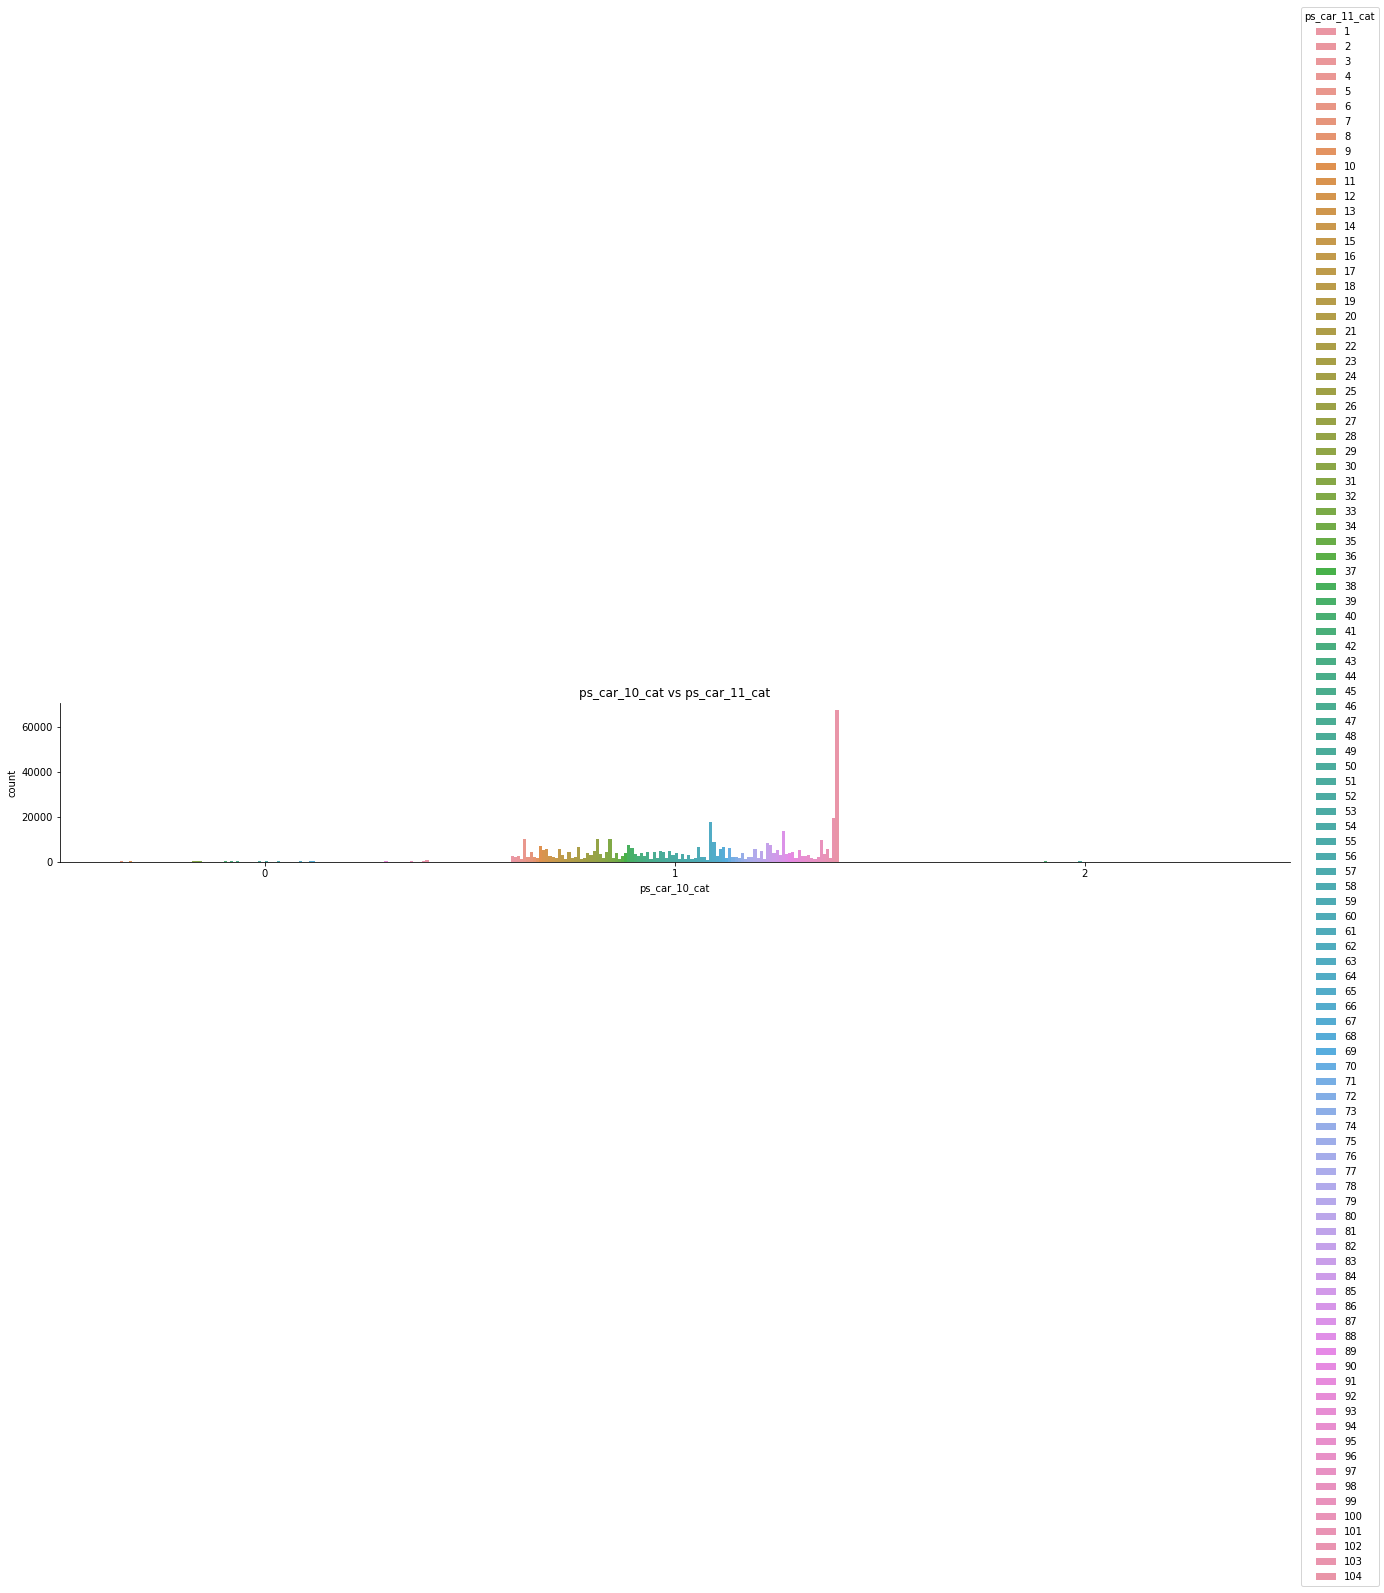

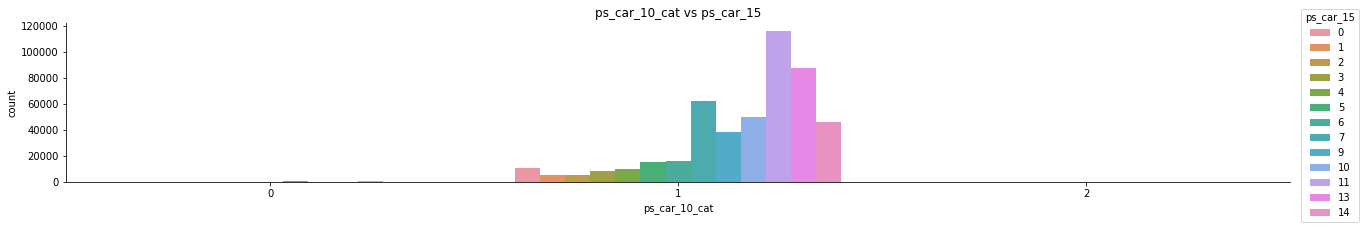

In [41]:
train.ps_car_10_cat.hist()
plt.figure()
sns.barplot(x='ps_car_10_cat', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_car_10_cat', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_car_10_cat vs ' + column)
    plt.show()

### (Make) ps_car_11_cat

Identifies car model:
* Nicely groups variety of features: ps_car_04_cat, ps_car_06_cat
* Value 104 is some kind of a "dump" level: grouping is broken there
* Weird interaction with ps_car_02_cat

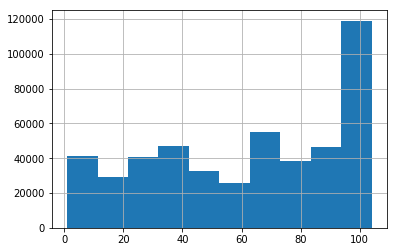

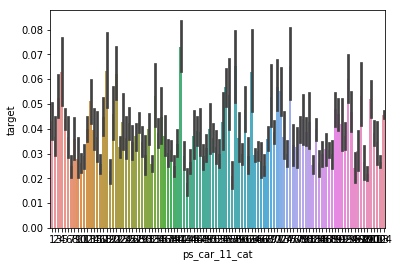

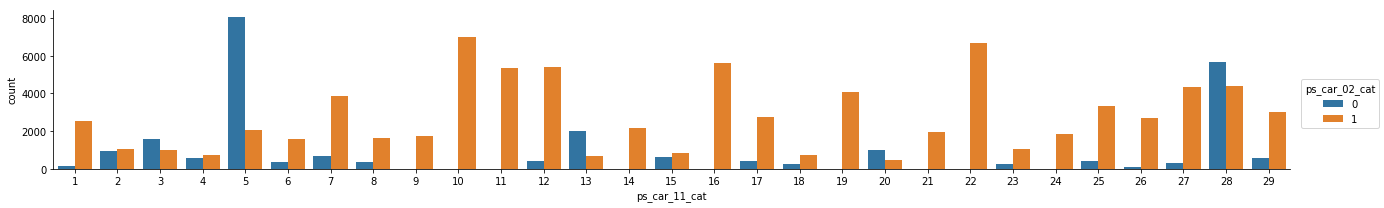

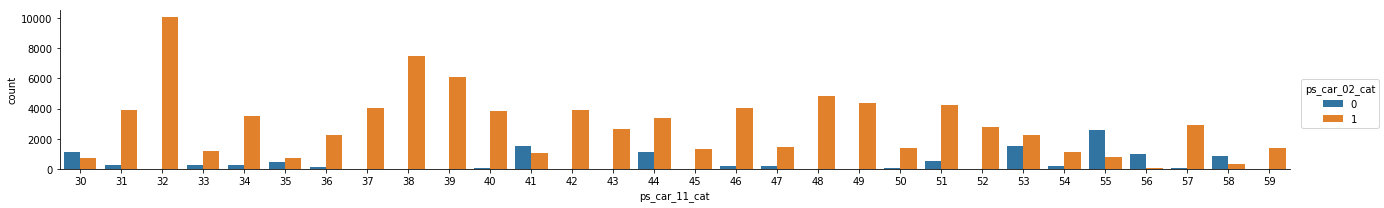

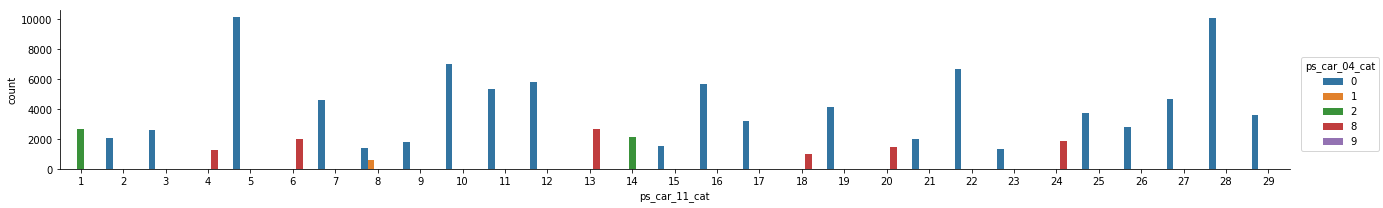

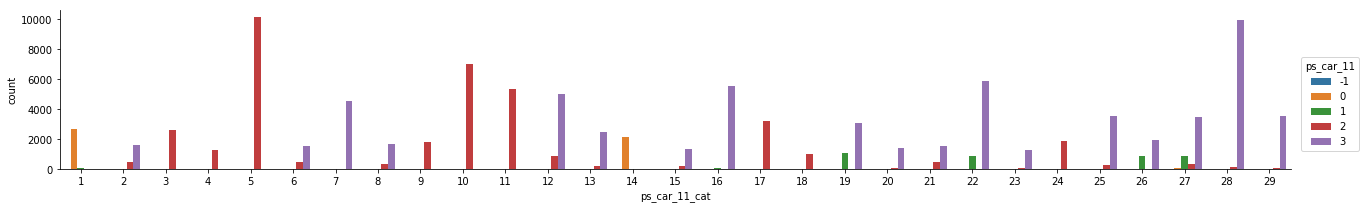

In [42]:
train.ps_car_11_cat.hist()
plt.figure()
sns.barplot(x='ps_car_11_cat', y='target', data=train)

sns.factorplot(x='ps_car_11_cat', hue='ps_car_02_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_11_cat', hue='ps_car_02_cat', data=train[train.ps_car_11_cat.isin(range(30, 60))], kind='count', size=3, aspect=6)

sns.factorplot(x='ps_car_11_cat', hue='ps_car_04_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)

sns.factorplot(x='ps_car_11_cat', hue='ps_car_06_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_11_cat', hue='ps_car_06_cat', data=train[train.ps_car_11_cat.isin(range(90, 105))], kind='count', size=3, aspect=6)

sns.factorplot(x='ps_car_11_cat', hue='ps_car_11', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)

### (Doors) ps_car_11

Number of doors (above 2) for the car:
* Ordered
* Depends heavily on the car make

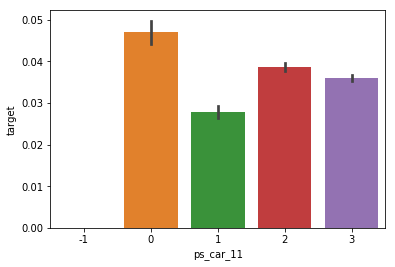

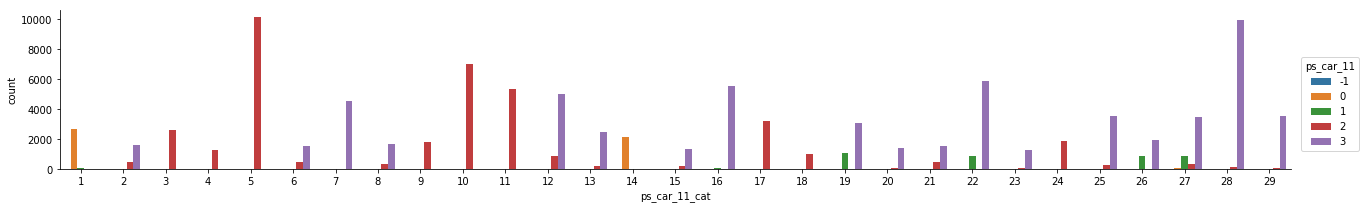

In [43]:
train.ps_car_11.hist()
plt.figure()
sns.barplot(x='ps_car_11', y='target', data=train)
sns.factorplot(x='ps_car_11_cat', hue='ps_car_11', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)

### (Engine Volume) ps_car_12
Cylinder capacity of the car engine:
* Hola from Kaggle
* Maps nicely to most popular engine sizes
* Lots of duplicated levels
* Lots of fairly unique levels, which correspond to real engines from external sources

/Users/alexander/.pyenv/versions/3.6.3/envs/kaggle-port-seguro-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


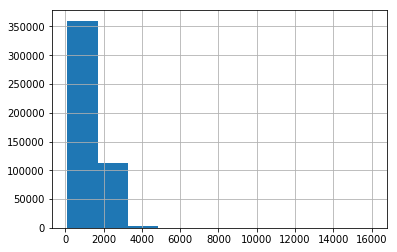

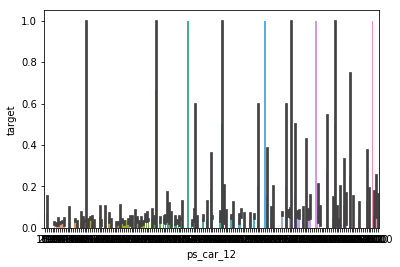

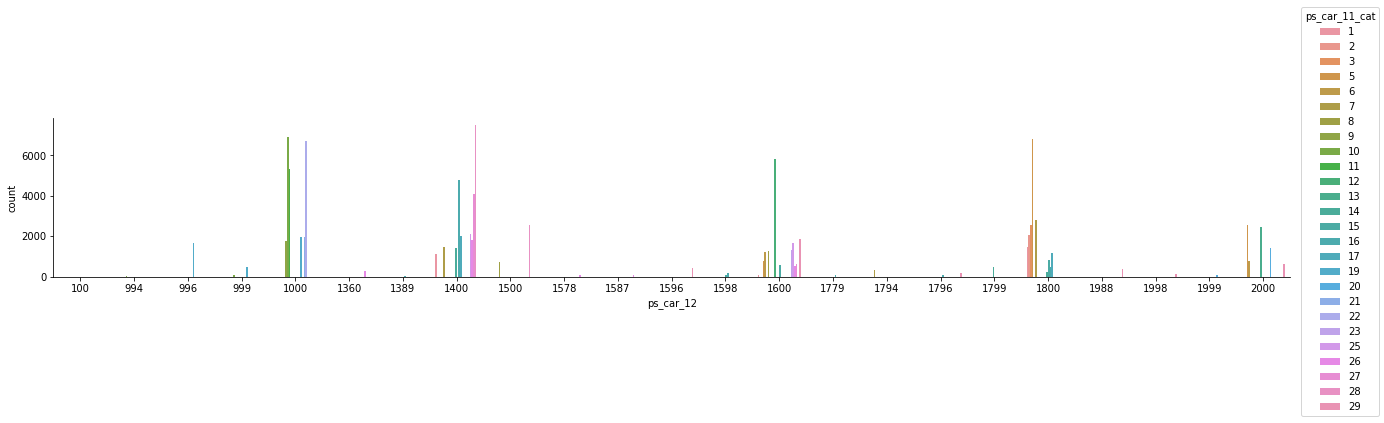

In [44]:
train.ps_car_12.hist()
plt.figure()
sns.barplot(x='ps_car_12', y='target', data=train)
sns.factorplot(x='ps_car_12', hue='ps_car_11_cat', data=train[train.ps_car_11_cat.isin(range(30))][train.ps_car_12 < 2001], kind='count', size=3, aspect=6)

### (Car price) ps_car_13
The price of the car:
* Lots of unique values
* Lots of outliers
* Ratio of ps_car_02_cat == 0 grows with the price
* Ratio of ps_car_08_cat == 0 grows with the price
* ps_car_11_cat correspond to several neighboring levels (in case of binning)

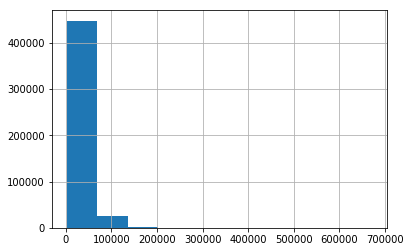

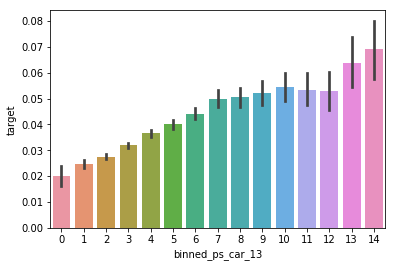

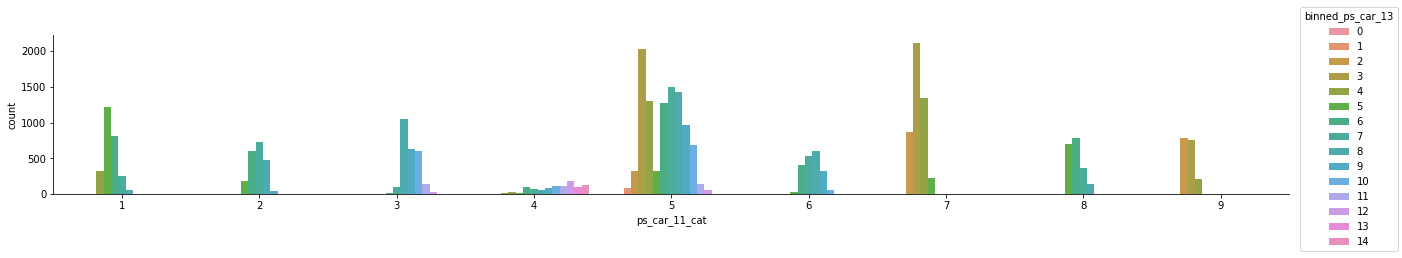

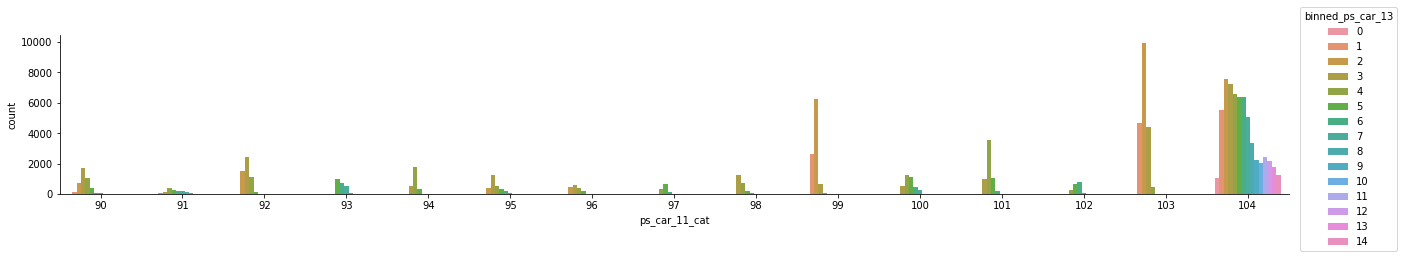

In [46]:
train.ps_car_13.hist()
plt.figure()
tmp_train = train[train.ps_car_13 < 100000].copy()
tmp_train['binned_ps_car_13'] = pd.cut(tmp_train.ps_car_13, bins=15, labels=False)
sns.barplot(x='binned_ps_car_13', y='target', data=tmp_train)

sns.factorplot(x='binned_ps_car_13', hue='ps_car_02_cat', data=tmp_train, kind='count', size=3, aspect=6)
sns.factorplot(x='binned_ps_car_13', hue='ps_car_08_cat', data=tmp_train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_11_cat', hue='binned_ps_car_13', data=tmp_train[tmp_train.ps_car_11_cat.isin(range(10))], kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_11_cat', hue='binned_ps_car_13', data=tmp_train[tmp_train.ps_car_11_cat.isin(range(90, 105))], kind='count', size=3, aspect=6)

### ps_car_14

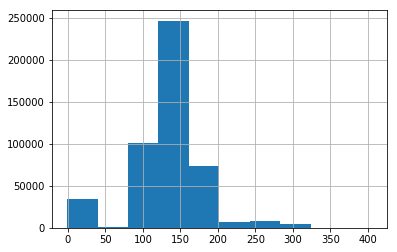

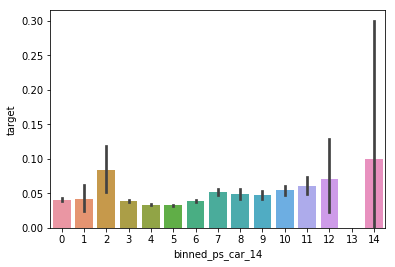

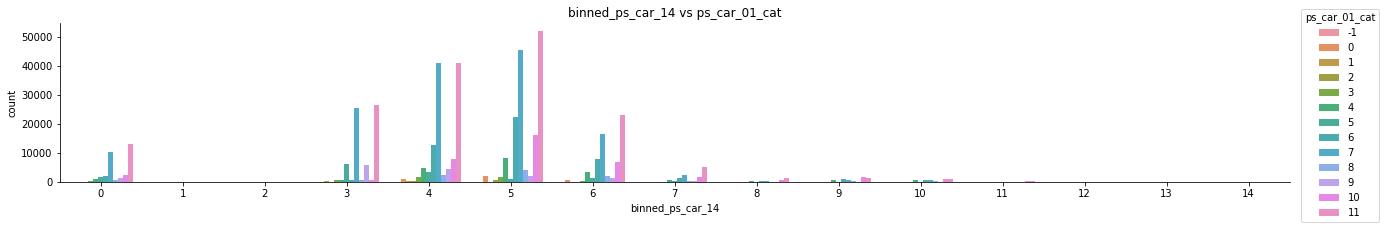

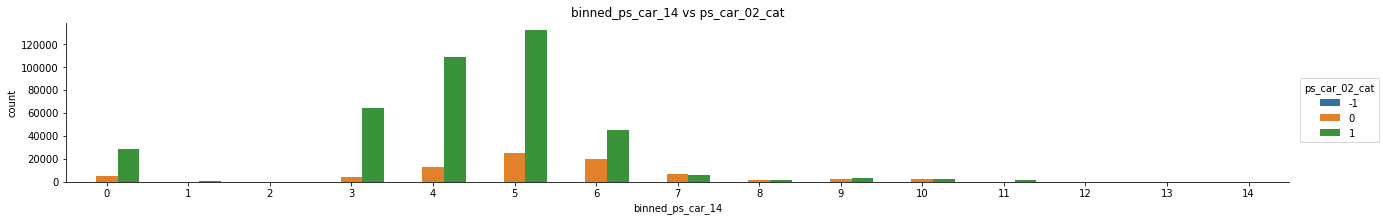

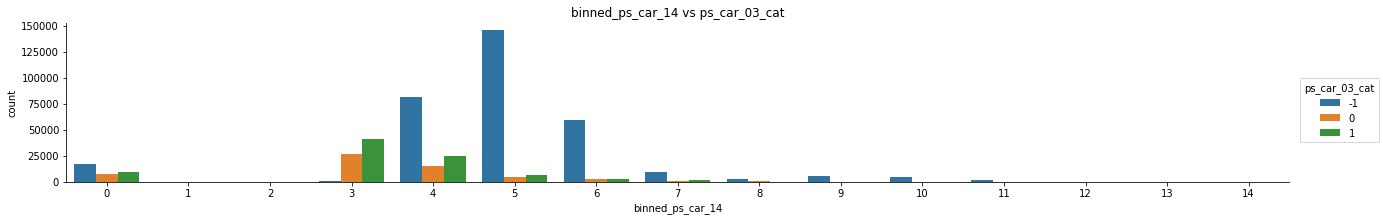

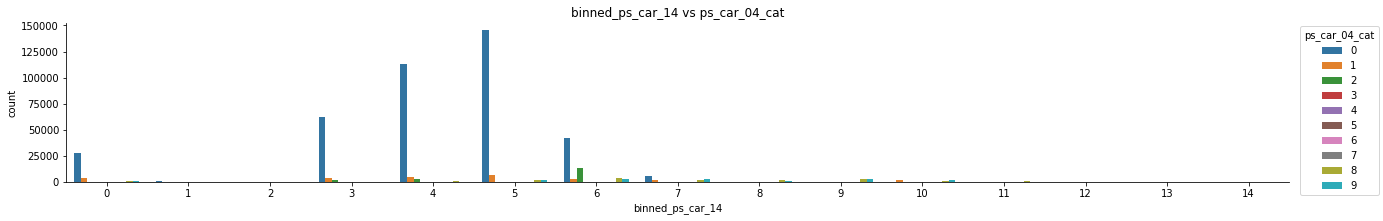

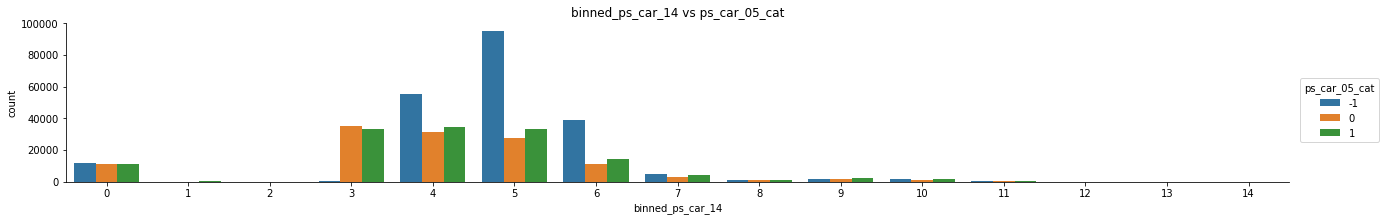

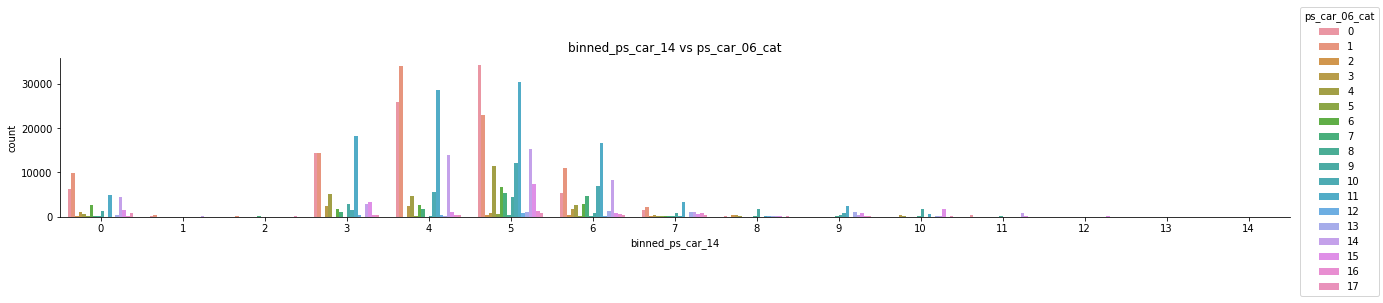

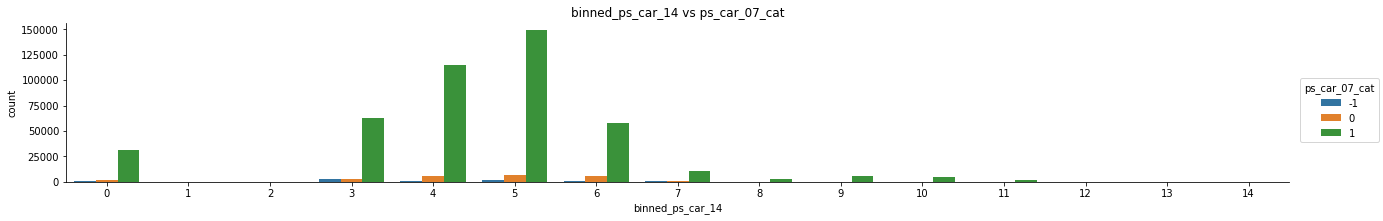

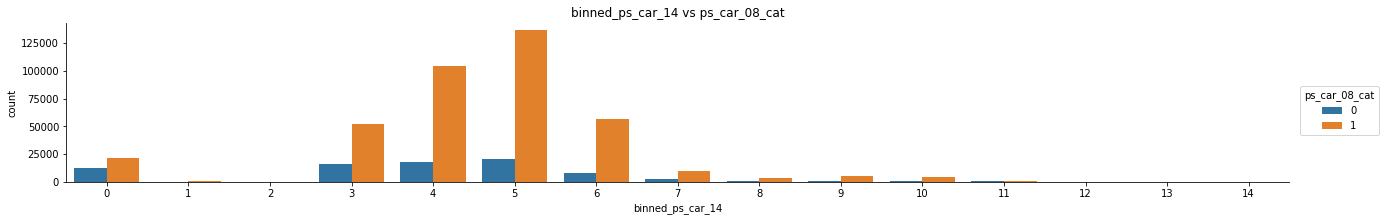

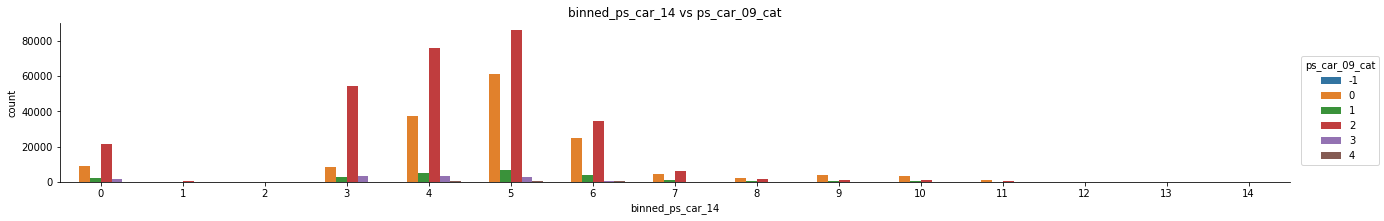

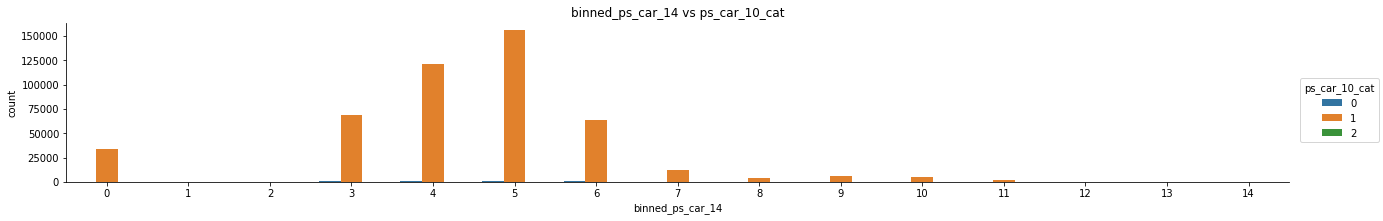

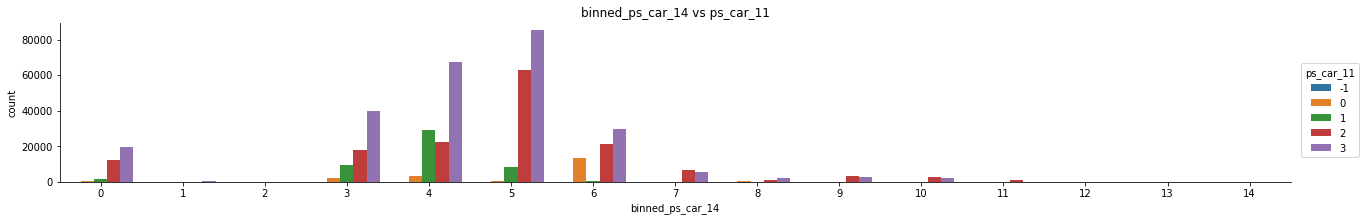

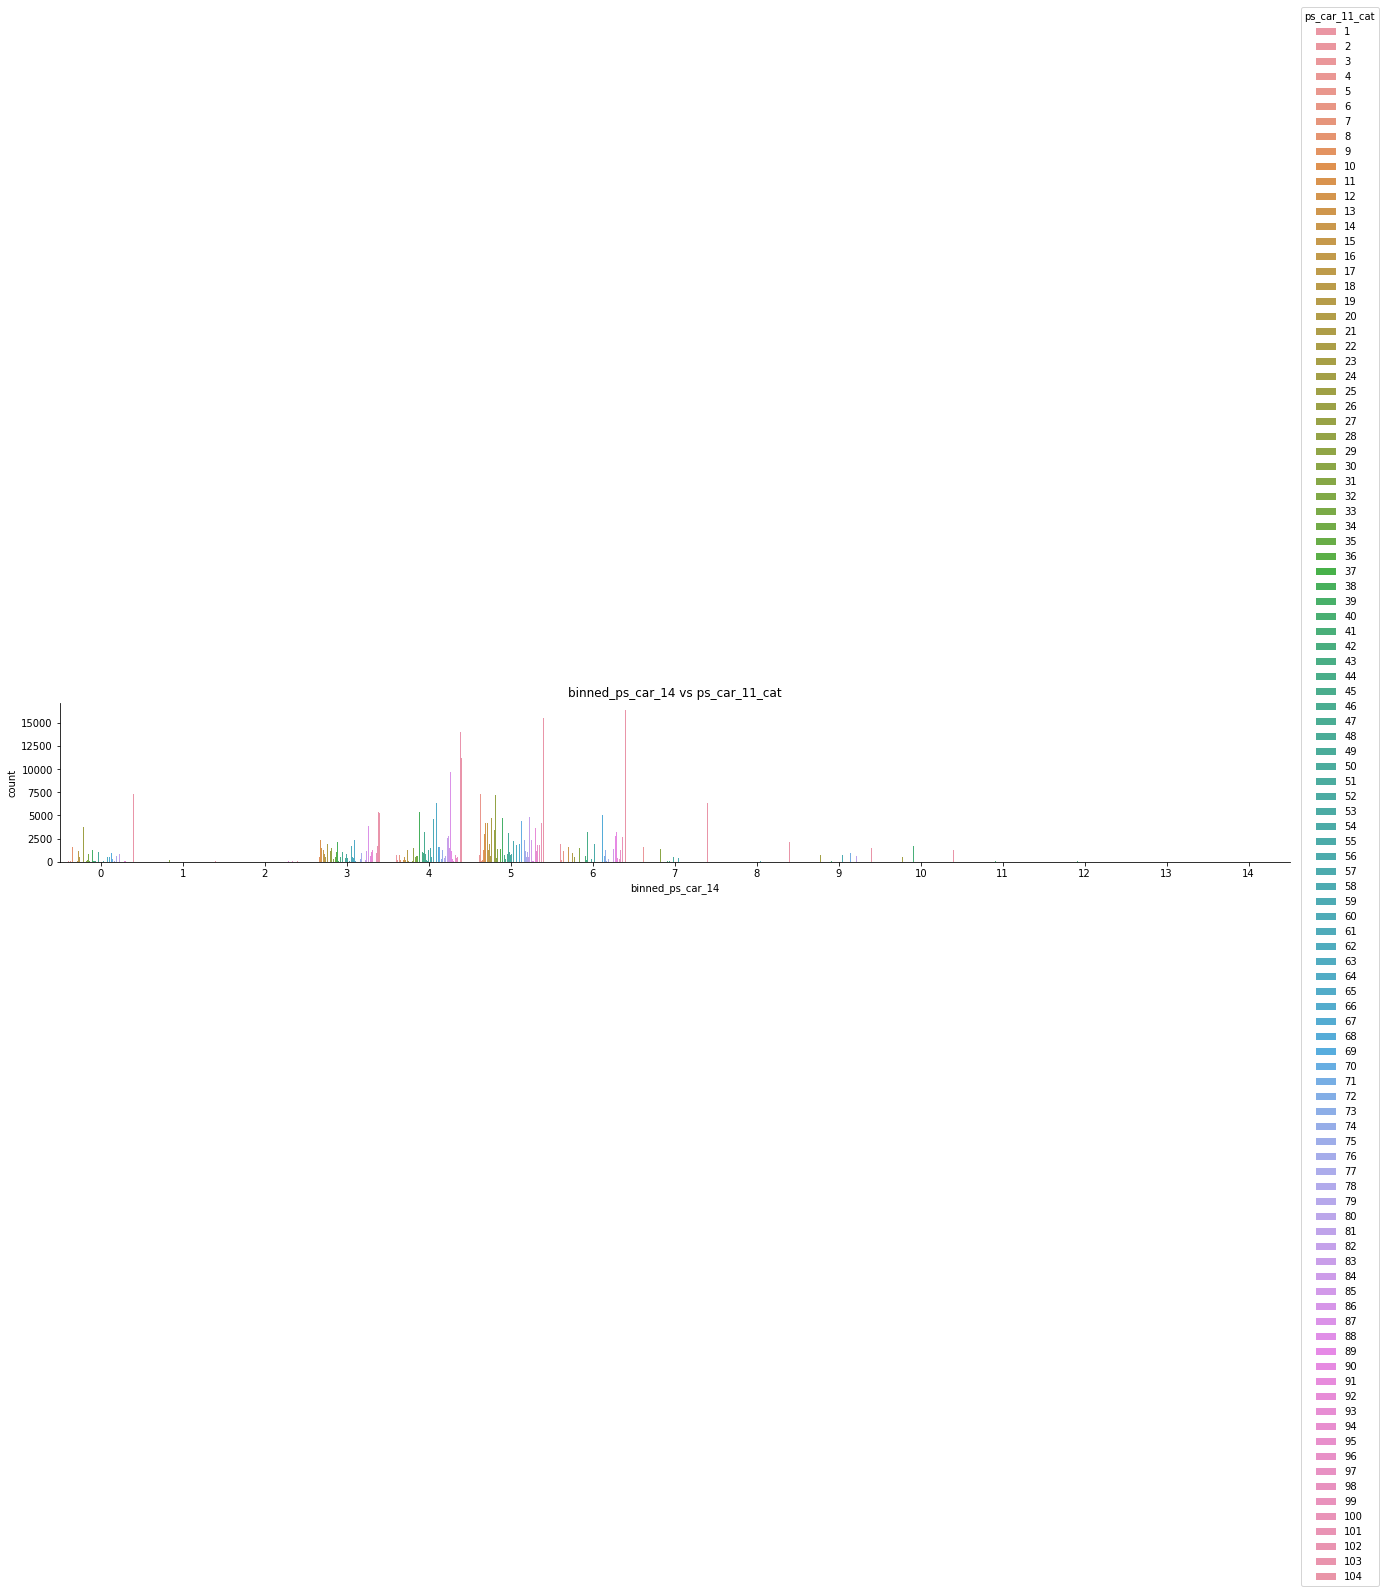

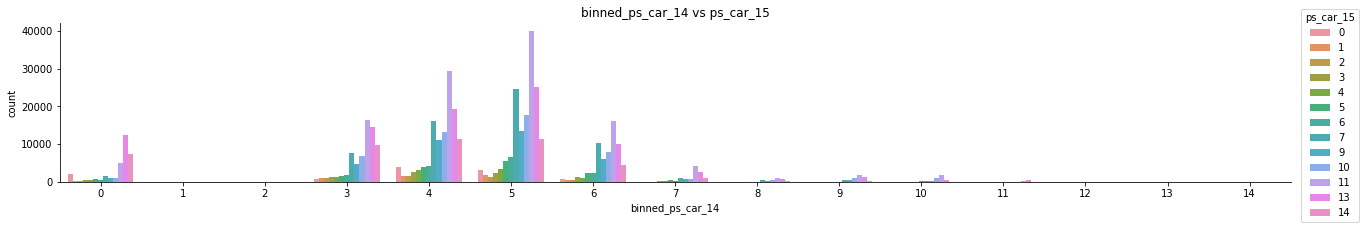

In [48]:
train.ps_car_14.hist()
plt.figure()
tmp_train = train.copy()
tmp_train['binned_ps_car_14'] = pd.cut(tmp_train.ps_car_14, bins=15, labels=False)
sns.barplot(x='binned_ps_car_14', y='target', data=tmp_train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='binned_ps_car_14', hue=column, data=tmp_train, kind='count', size=3, aspect=6)
    plt.title('binned_ps_car_14 vs ' + column)
    plt.show()

### (Car age) ps_car_15
The age of the car, with levels 13 and 14 being the most recent:
* ps_car_08_cat is 0 for highest levels

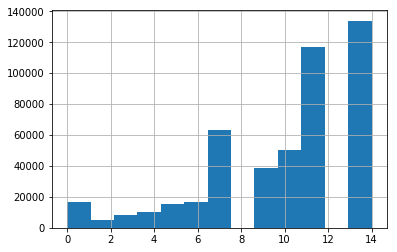

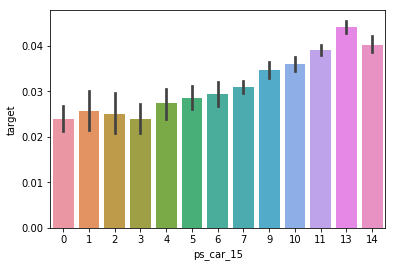

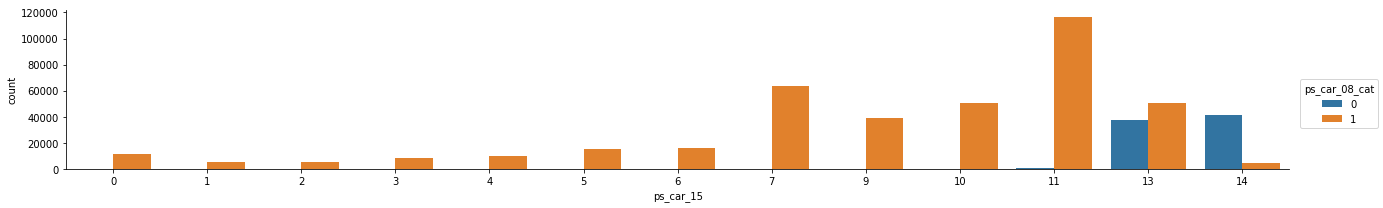

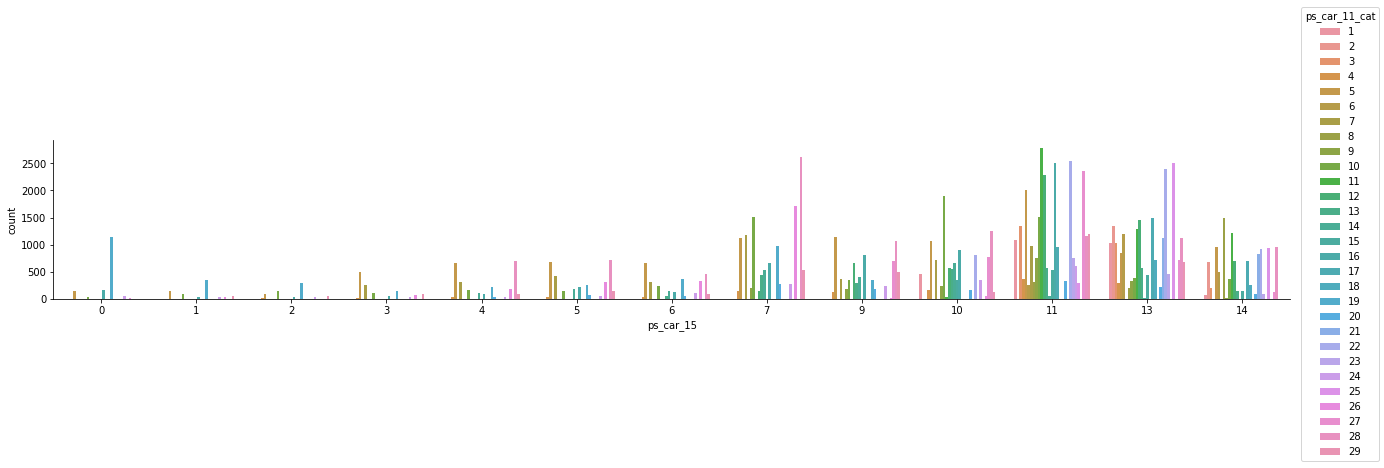

In [53]:
train.ps_car_15.hist(bins=13)
plt.figure()
sns.barplot(x='ps_car_15', y='target', data=train)
sns.factorplot(x='ps_car_15', hue='ps_car_08_cat', data=train, kind='count', size=3, aspect=6)
sns.factorplot(x='ps_car_15', hue='ps_car_11_cat', data=train[train.ps_car_11_cat.isin(range(30))], kind='count', size=3, aspect=6)

### ps_reg_01

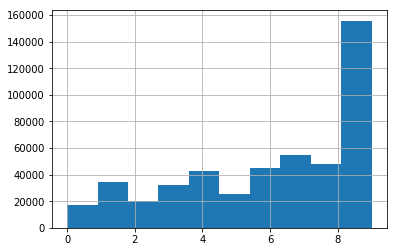

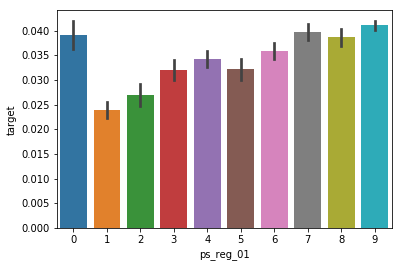

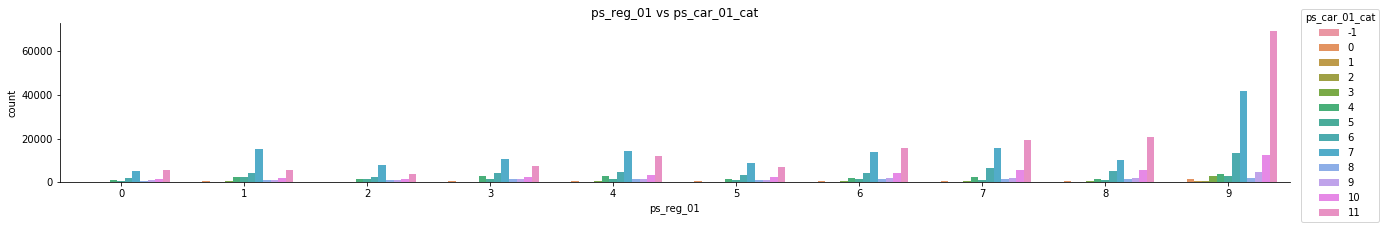

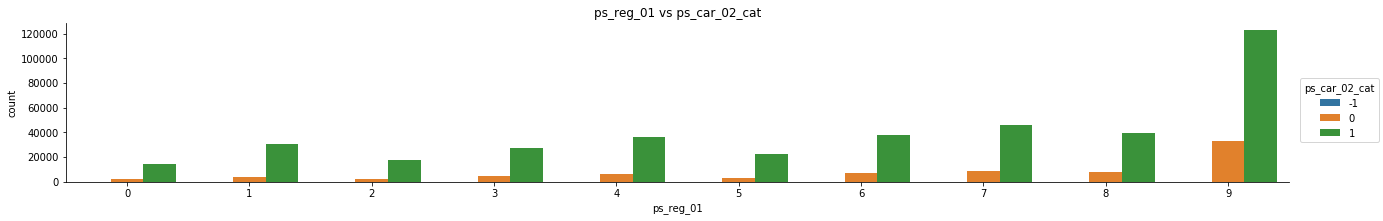

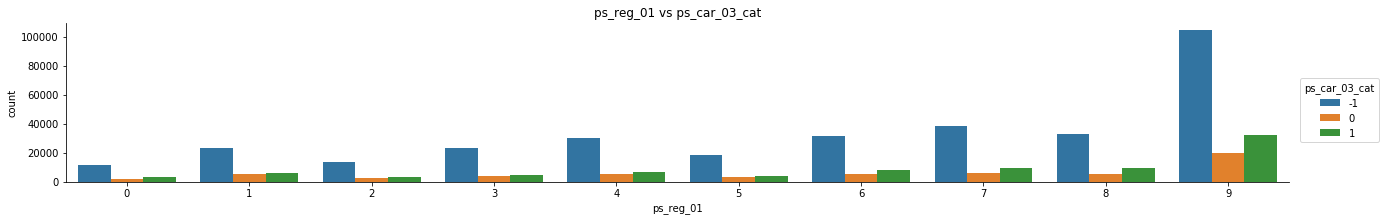

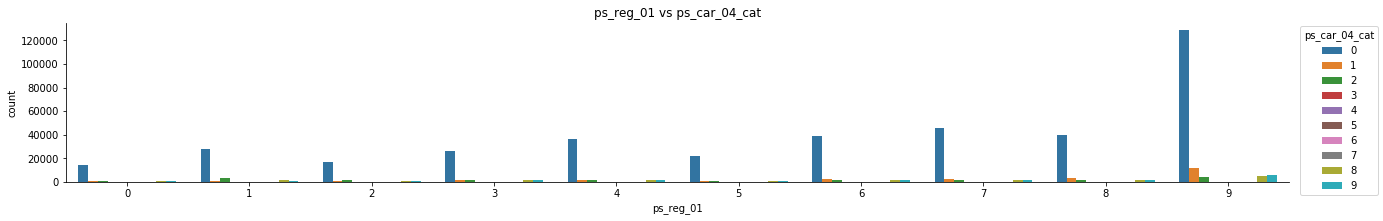

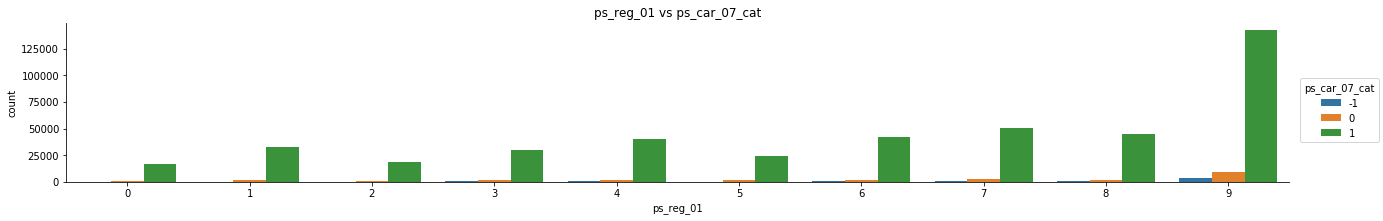

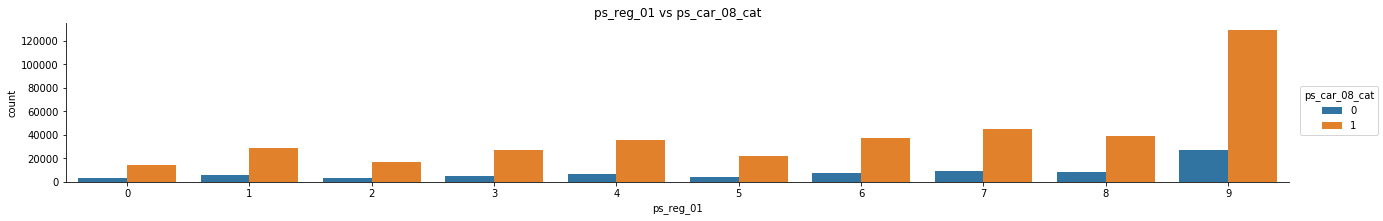

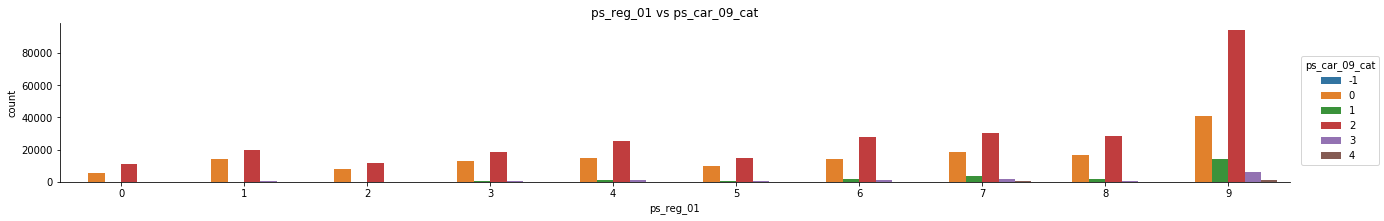

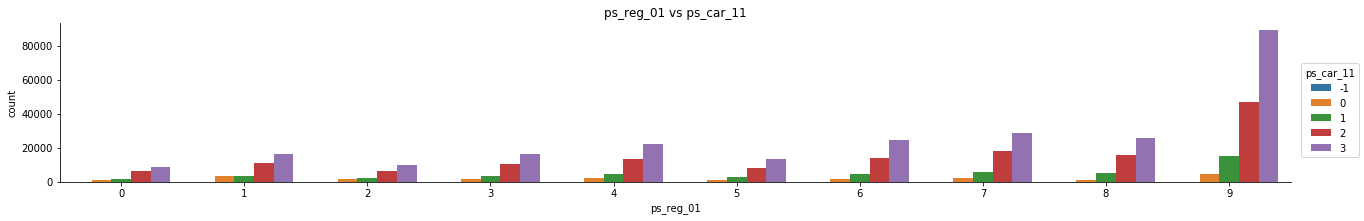

In [59]:
train.ps_reg_01.hist()
plt.figure()
sns.barplot(x='ps_reg_01', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_reg_01', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_reg_01 vs ' + column)
    plt.show()

### ps_reg_02

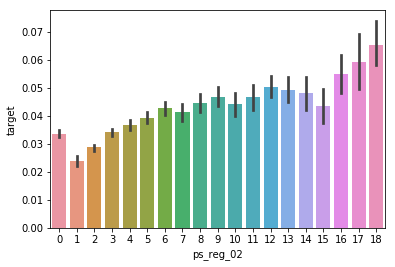

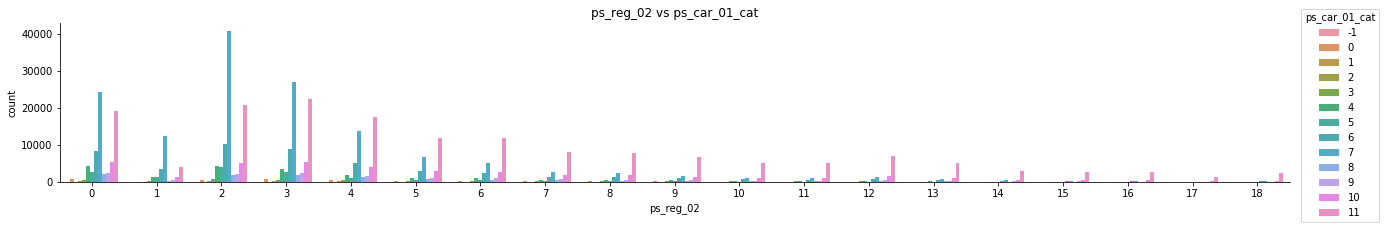

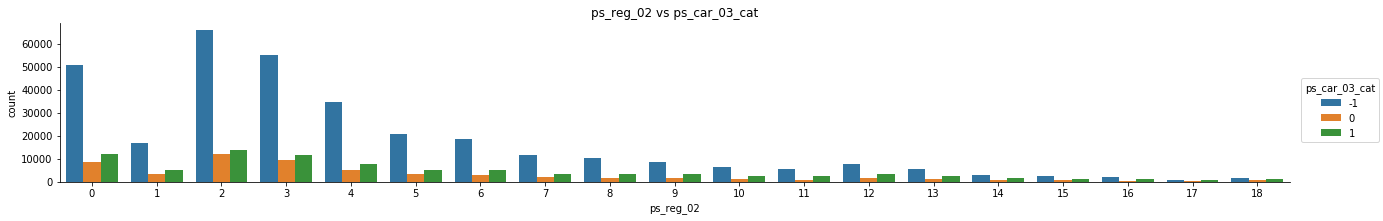

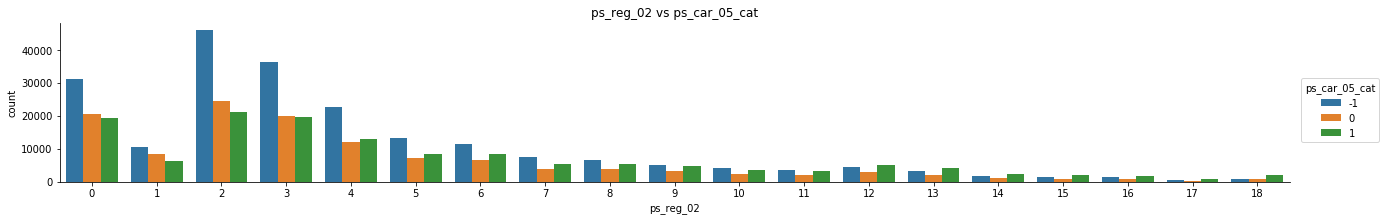

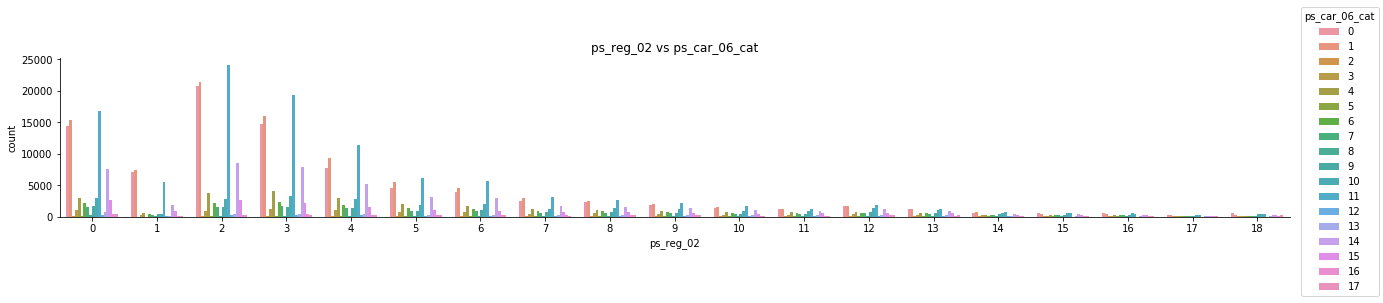

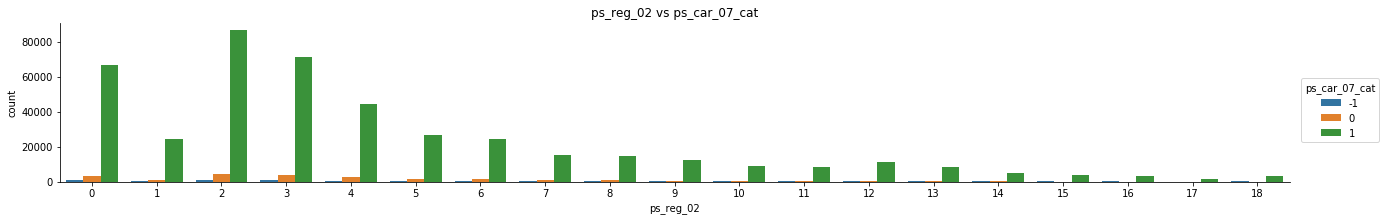

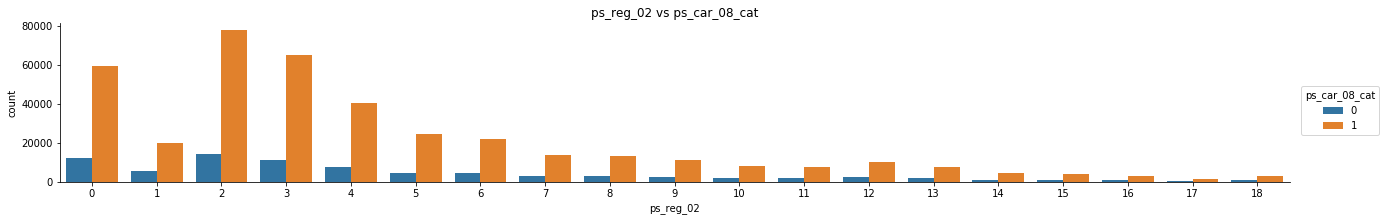

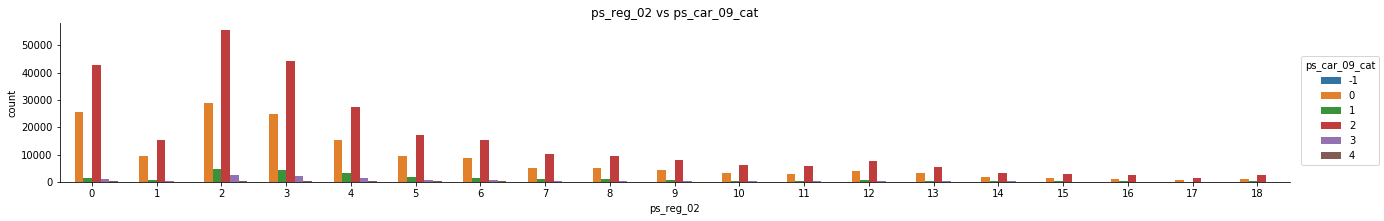

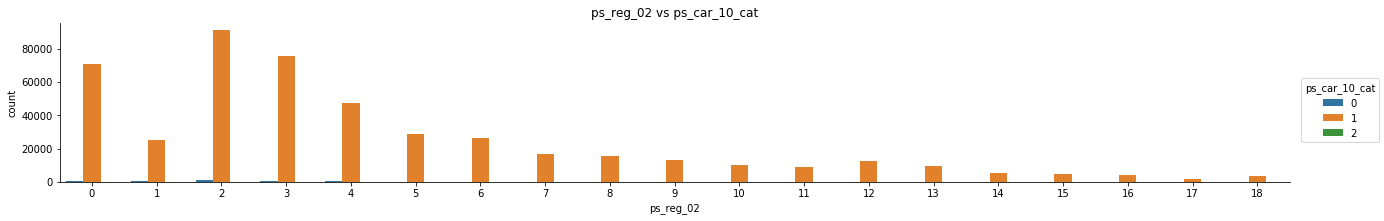

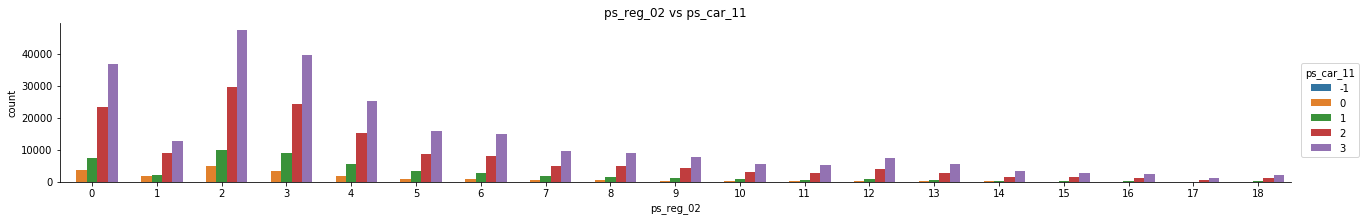

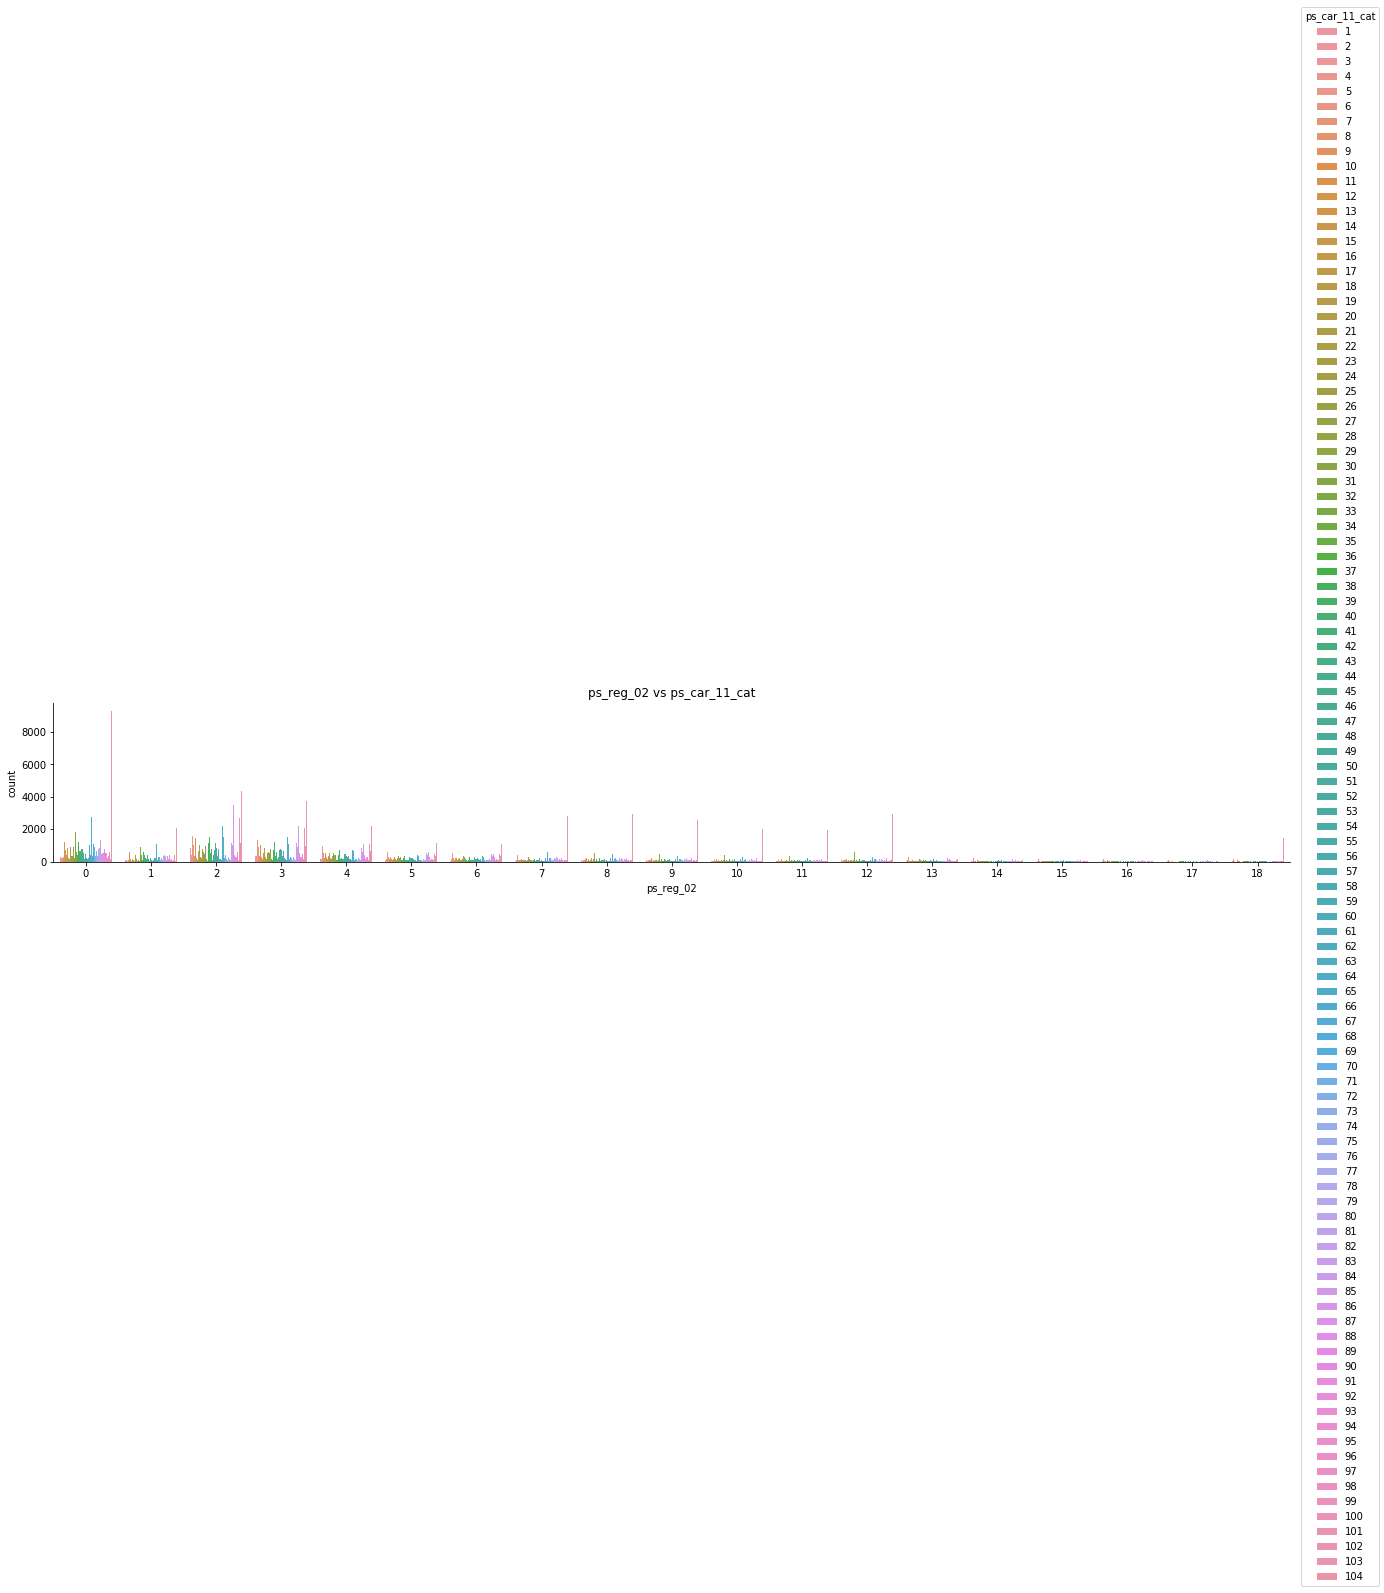

In [60]:
train.ps_reg_02.hist()
plt.figure()
sns.barplot(x='ps_reg_02', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_reg_02', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_reg_02 vs ' + column)
    plt.show()

### (State) ps_reg_04

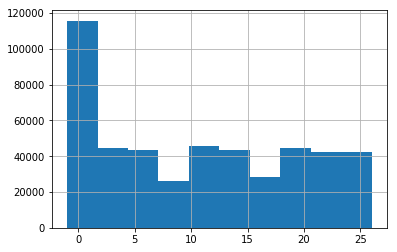

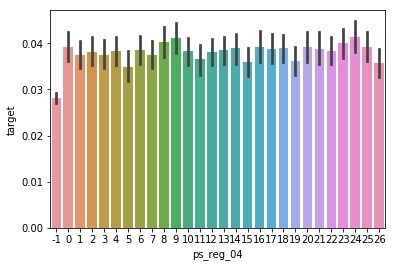

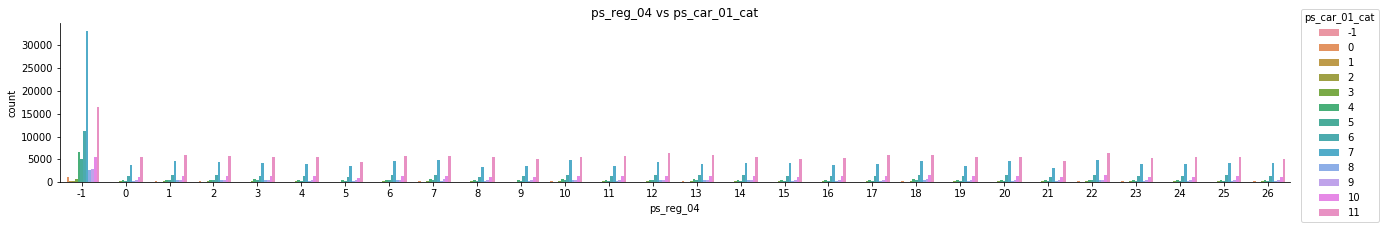

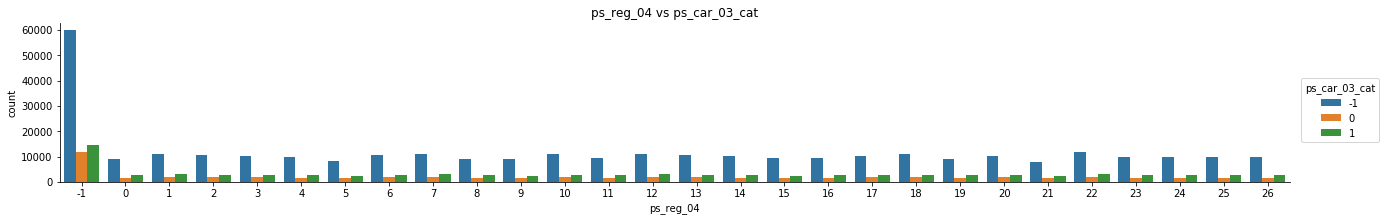

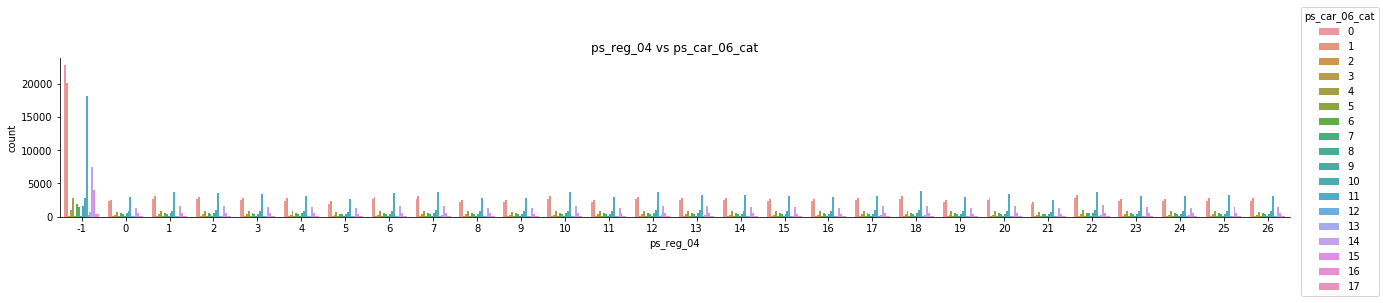

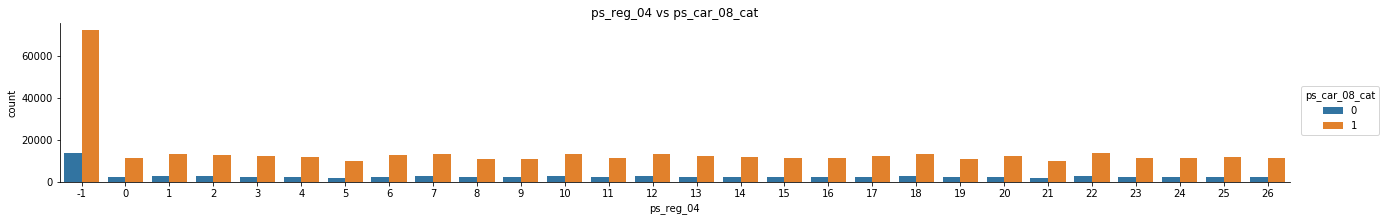

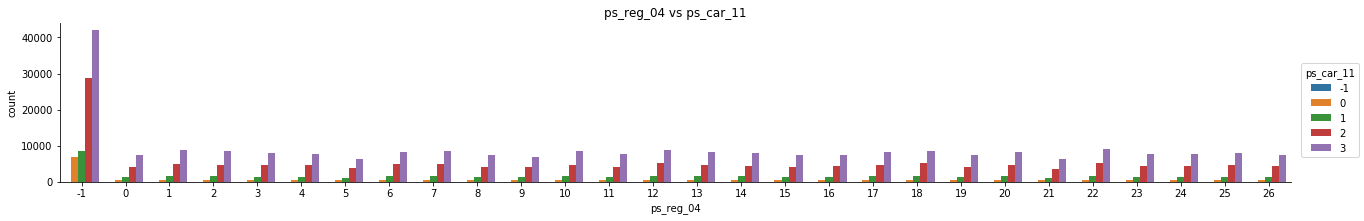

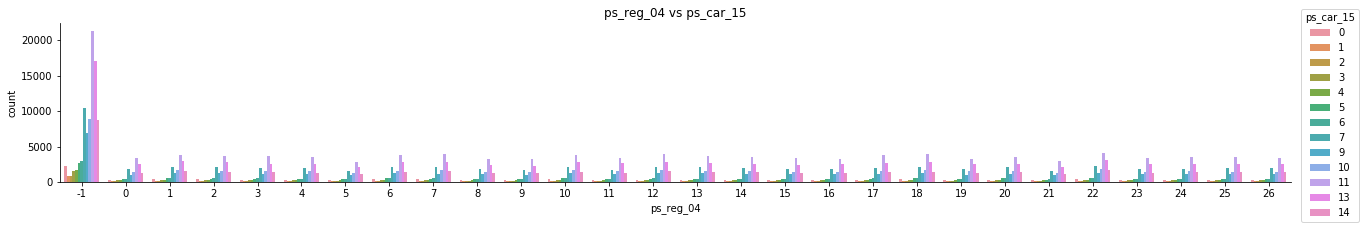

In [62]:
train.ps_reg_04.hist()
plt.figure()
sns.barplot(x='ps_reg_04', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_reg_04', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_reg_04 vs ' + column)
    plt.show()

### (Municipality) ps_reg_05

In [ ]:
train.ps_reg_05.hist()
plt.figure()
sns.barplot(x='ps_reg_05', y='target', data=train)

for column in car_columns:
    plt.figure()
    sns.factorplot(x='ps_reg_05', hue=column, data=train, kind='count', size=3, aspect=6)
    plt.title('ps_reg_05 vs ' + column)
    plt.show()

## Learning curves

In [163]:
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier
for state, policies in train.groupby('ps_reg_04'):
    model = LGBMClassifier(max_bin=16, n_estimators=35)
    scores = cross_val_score(model, policies.drop('target', axis=1), policies.target, scoring='roc_auc', cv=5)
    print(scores.mean(), scores.std(), scores)
    break

0.642569701339 0.00959398990066 [ 0.65137263  0.62965187  0.64086503  0.65537953  0.63557944]


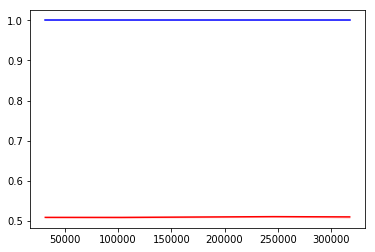

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
# model = LGBMClassifier(max_bin=16, n_estimators=35)
model = KNeighborsClassifier(weights='distance')

X = train.drop('target', axis=1)
y = train.target

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, scoring='roc_auc')

train_scores_mean = np.array(list(map(np.mean, train_scores)))
train_scores_std = np.array(list(map(np.std, train_scores)))
from sklearn.neighbors import KNeighborsClassifier

plt.plot(train_sizes, train_scores_mean, label='Training score', color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="b")

test_scores_mean = np.array(list(map(np.mean, test_scores)))
test_scores_std = np.array(list(map(np.std, test_scores)))

plt.plot(train_sizes, test_scores_mean, label='Test score', color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="r")

## Imputation

In [206]:
test = pd.read_csv('./data/test.csv')

data = train.drop('target', axis=1)
for col in data.columns:
    values = data[col].sort_values().unique()[:10]
    if -1 in values:
        count = len(data[data[col] == -1])
        print(col, count, 'of', len(data))
        
#         if '_cat' in col:
#             model = LGBMClassifier(max_bin=16, n_estimators=35)
#             X = data[data[col] != -1].drop(col, axis=1)
#             y = data[data[col] != -1][col]
#             pred = cross_val_predict(model, X, y)
#             print('Imuting ', col)
#             print(classification_report(y, pred))

ps_ind_02_cat 164 of 476168
ps_ind_04_cat 65 of 476168
ps_ind_05_cat 4618 of 476168
ps_car_01_cat 87 of 476168
ps_car_02_cat 3 of 476168
ps_car_03_cat 328880 of 476168
ps_car_05_cat 213268 of 476168
ps_car_07_cat 9171 of 476168
ps_car_09_cat 459 of 476168
ps_car_11 4 of 476168
ps_car_14 34051 of 476168
ps_reg_04 86157 of 476168
ps_reg_05 86157 of 476168


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from lightgbm.sklearn import LGBMClassifier

model = LGBMClassifier(max_bin=16, n_estimators=35)
X = train[train.ps_ind_]

In [202]:
classification_report?

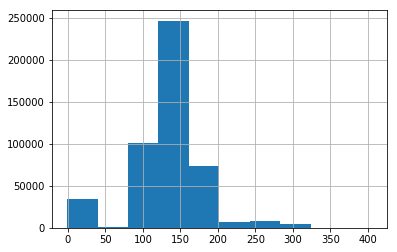

In [207]:
train.ps_car_14.hist()